In [1]:
# Install prerequisites for evaluation
import numpy as np
import pandas as pd
import seaborn as sns
import importlib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from os import listdir, path
from IPython.display import display, Markdown


import os
import sys

# if current working directory includes "evaluation" change to parent directory
if "evaluation" in os.getcwd():
    os.chdir("..")
    # Add parent directory to sys.path
    sys.path.append(os.getcwd())



# Verify
print(f"Current working directory: {os.getcwd()}")
print(f"sys.path: {sys.path}")

Current working directory: /root/oxn
sys.path: ['/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/root/oxn/venv/lib/python3.11/site-packages', '/root/oxn']


# Evaluation Script
Welcome to the evaluation script. Here, you can interact with results from oxn observability experiments.

To get you started, we have prepared a few experiments:

In [2]:
display_text = ""
for experiments in listdir("experiments"):
   # read first line 
   experiment_disciption = None
   with open(path.join("experiments", experiments)) as f:
      experiment_disciption = f.readline().strip()
      experiment_disciption = experiment_disciption[1:] if experiment_disciption[0] == "#" else ""
   display_text += f" - **{experiments}** : {experiment_disciption} \n"
display(Markdown(display_text))

 - **recommendation_k8_base_10_percent.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 
 - **recommendation_loss15_baseline.yml** :  inject a packet loss of 15% in the recomendation service for 120s with default settings 
 - **recommendation_k8_delay_5_percent.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 
 - **recommendation_delay90_baseline.yml** :  inject a packet delay of 0-90ms in the recomendation service for 120s with default settings 
 - **recommendation_pause_baseline.yml** :  injects a 120s pause in the recomendation service 
 - **recommendation_k8_delay_1m_otel.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 
 - **recommendation_delay90_A.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 
 - **recommendation_loss15_B.yml** :  inject packet loss of 15% while increasing sampling rate to 5% 
 - **recommendation_k8_base_1m_otel.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 
 - **recommendation_delay90_B.yml** :  inject a packet delay of 0-90ms while increasing sampling rate to 5% 
 - **recommendation_k8_base_5_percent.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 
 - **test.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 
 - **recommendation_loss15_C.yml** :  inject packet loss of 15% while increasing sampling rate to 10% 
 - **recommendation_loss15_A.yml** :  inject packet loss of 15% while increasing the otel metric inverval to 1s 
 - **recommendation_k8_delay_10_percent.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 
 - **recommendation_delay90_C.yml** :  inject a packet delay of 0-90ms while increasing sampling rate to 10% 
 - **recommendation_k8_delay_1s_otel.yml** :  inject a packet delay of 0-90ms while increasing the otel metric inverval to 1s 


You can perform any experiment using the following command:

```bash 
oxn experiments/file_from_above --report name_of_your_choice.yaml
```


# Reproduce paper figures and results

To recreate the PacketLoss results of the paper, start with the baseline experiment:
```bash
oxn experiments/recommendation_loss15_baseline.yml --report recommendation_loss15_baseline.yaml
```
then conduct experiments for the three design alternatives:
```bash
oxn experiments/recommendation_loss15_A.yml --report recommendation_loss15_A.yaml
oxn experiments/recommendation_loss15_B.yml --report recommendation_loss15_B.yaml
oxn experiments/recommendation_loss15_C.yml --report recommendation_loss15_C.yaml
```

Each experiment will run for around 10 minutes and once done will create a report which you can then review and interact with using the functions below.

In [3]:
# Import report
from gevent import monkey
monkey.patch_all()
import evaluation.evaluation as evaluation


importlib.reload(evaluation)

from evaluation.evaluation import Report

assert os.path.exists("reports"), "No reports directory found. Please run the experiments first."

#report = Report.from_file("reports/report_2024-10-07_15-32-55.yaml")


files_in_direcotry = listdir("reports")

# sort them by date
files_in_direcotry.sort(key=lambda x: path.getctime(path.join("reports",x)))

# Load the last experiment
last_experiment = files_in_direcotry[-1]

report_path = path.join("reports", last_experiment.replace(".yaml",".yaml"))
print(report_path)
print(os.getcwd())
report = Report.from_file(report_path)
print(f"Loaded report {last_experiment}")

assert report is not None, "No report found. Please run the experiments first."
assert isinstance(report, Report), "Report is not of type Report"


assert report.interactions is not None, "No interactions found."
assert report.interactions[0] is not None, "No interactions found. "
assert report.interactions[0].response_data is not None, "No data in interaction found"


reports/report_2024-11-23_01-00-03.yaml
/root/oxn
Loaded report report_2024-11-23_01-00-03.yaml


78
[Interaction(treatment=KubernetesProbabilisticHeadSamplingTreatment, response=TraceResponseVariable), Interaction(treatment=EmptyTreatment, response=TraceResponseVariable), Interaction(treatment=KubernetesProbabilisticHeadSamplingTreatment, response=TraceResponseVariable), Interaction(treatment=EmptyTreatment, response=TraceResponseVariable), Interaction(treatment=KubernetesProbabilisticHeadSamplingTreatment, response=MetricResponseVariable), Interaction(treatment=EmptyTreatment, response=MetricResponseVariable), Interaction(treatment=KubernetesProbabilisticHeadSamplingTreatment, response=MetricResponseVariable), Interaction(treatment=EmptyTreatment, response=MetricResponseVariable), Interaction(treatment=KubernetesProbabilisticHeadSamplingTreatment, response=MetricResponseVariable), Interaction(treatment=EmptyTreatment, response=MetricResponseVariable), Interaction(treatment=KubernetesProbabilisticHeadSamplingTreatment, response=MetricResponseVariable), Interaction(treatment=EmptyT

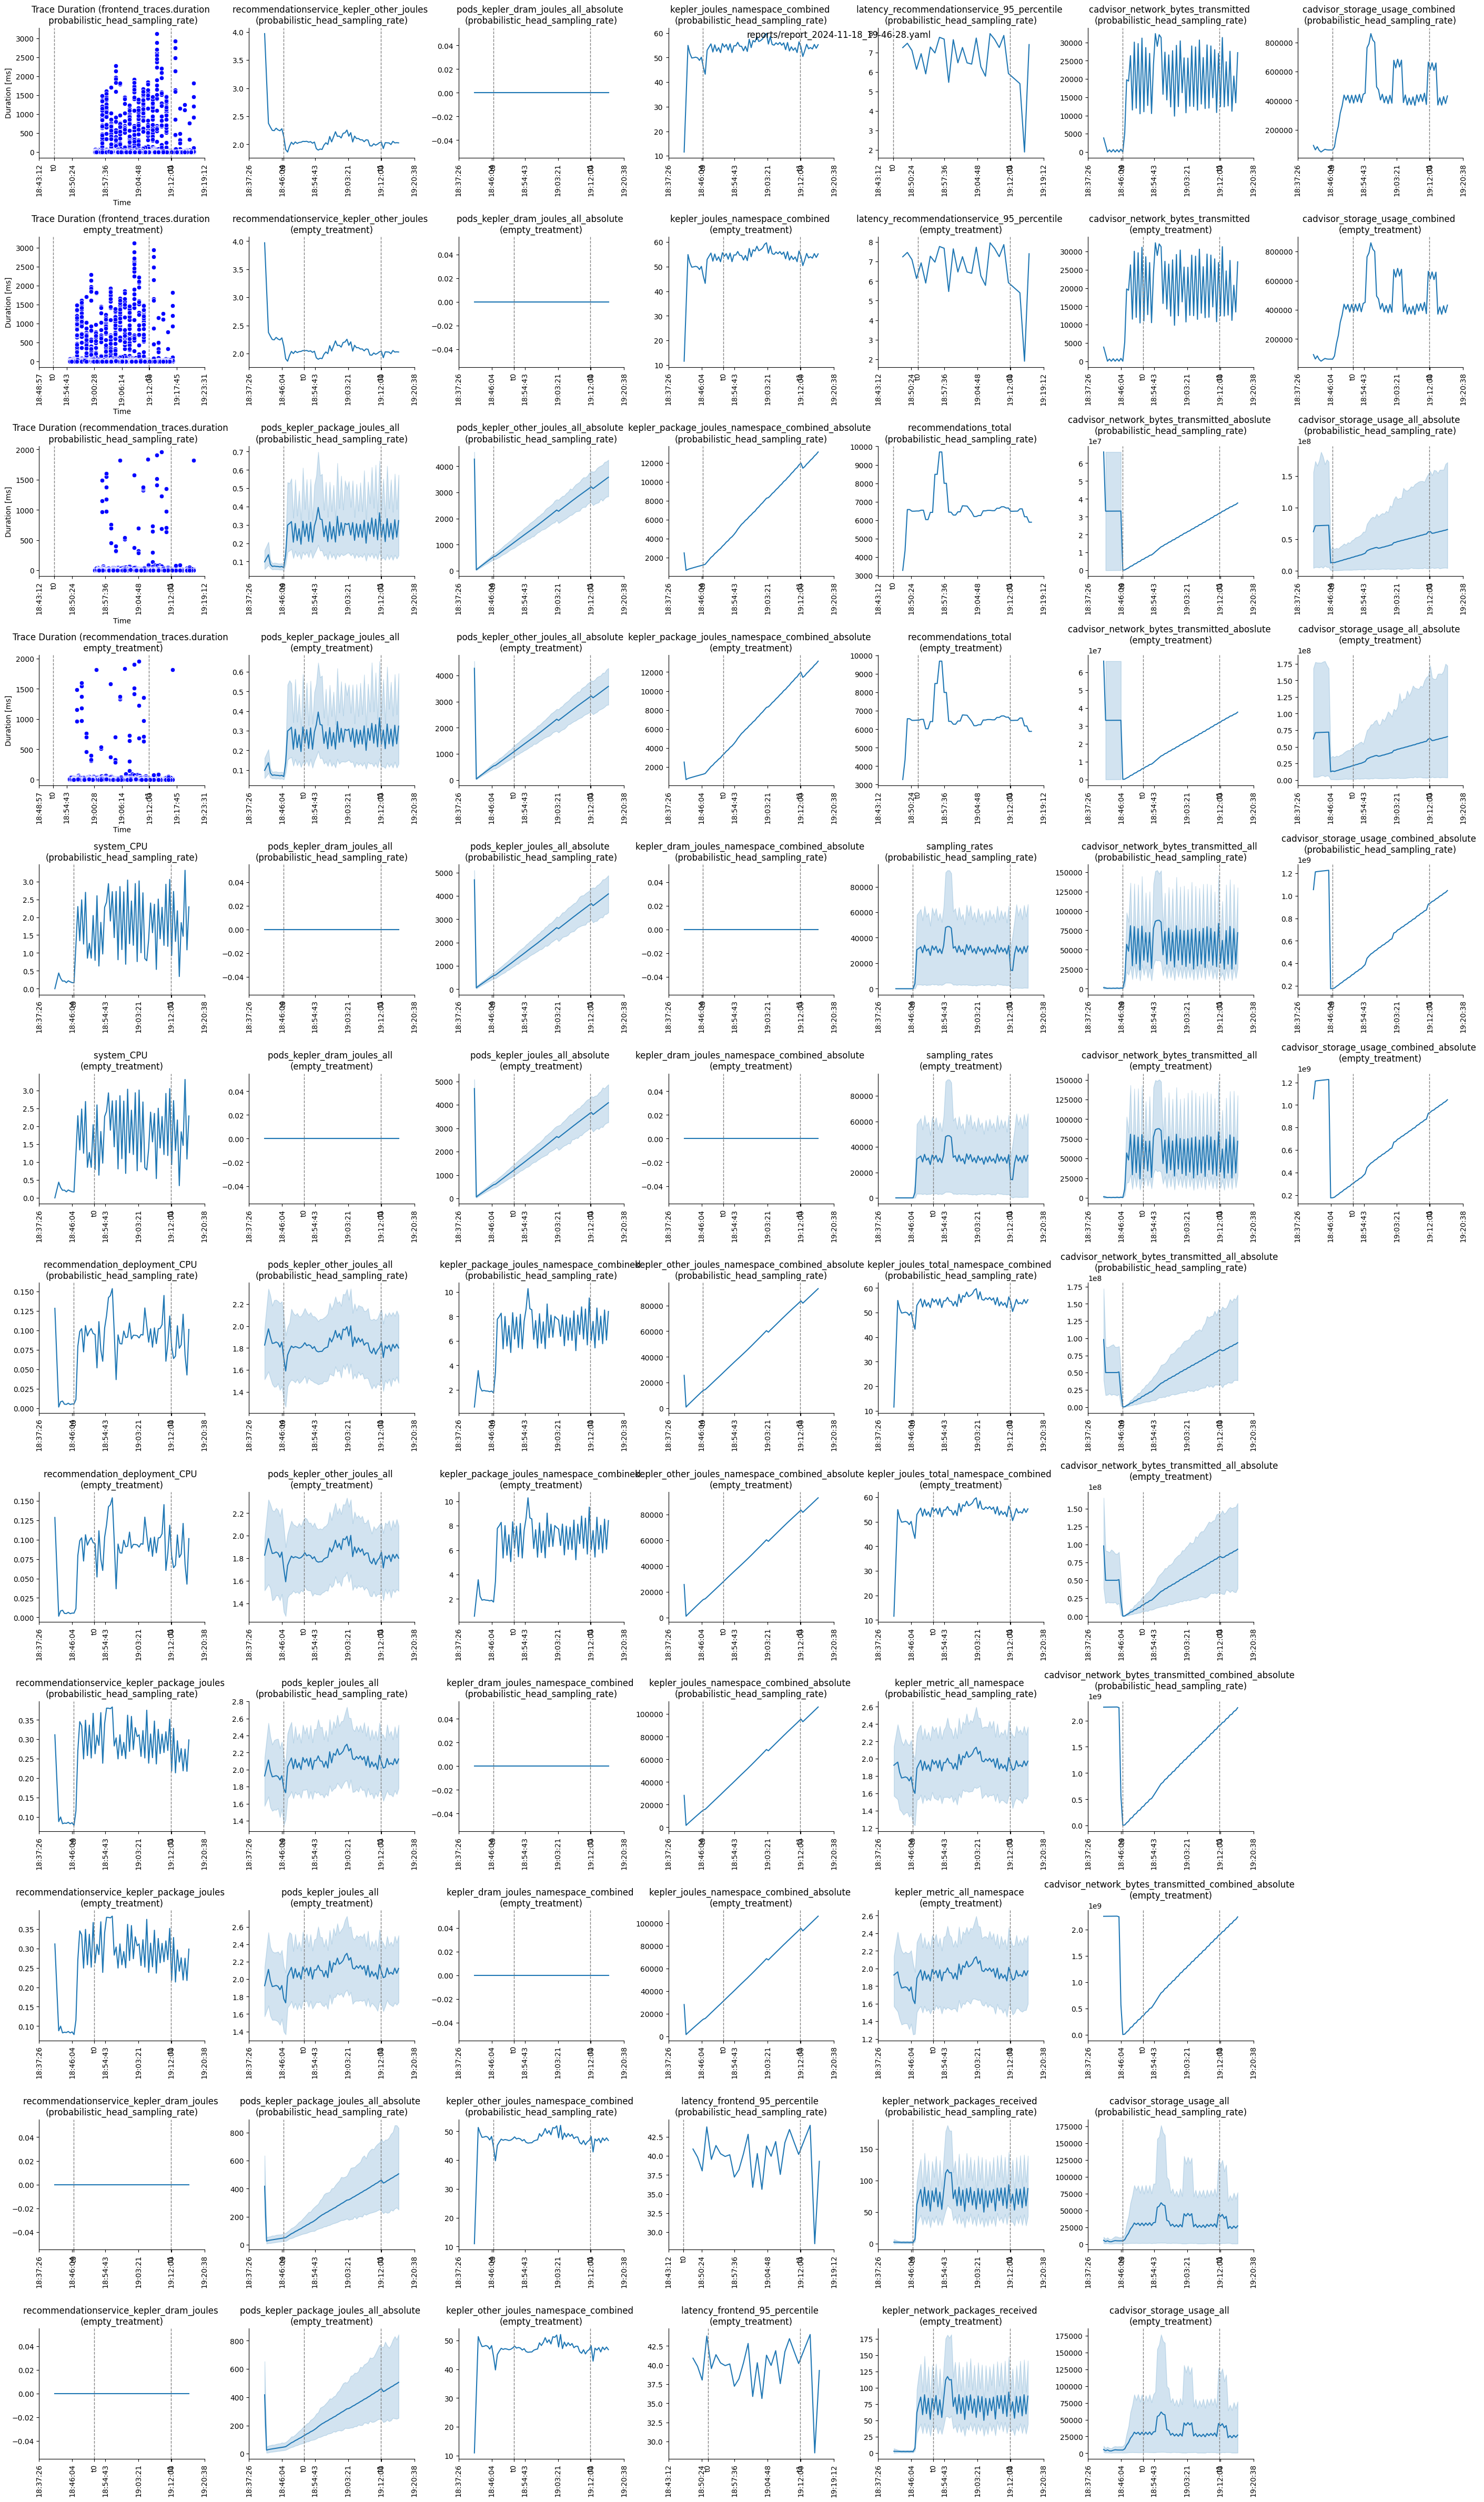

In [7]:
# Plot data for baseline from report
print(len(report.interactions))
print(report.interactions)
# print head
for i in range(len(report.interactions)):
   print("Interaction " + str(i) + " for " + report.interactions[i].treatment_name)
   print(report.interactions[i].response_name)
   print("Data points: " + str(len(report.interactions[i].response_data)))
report.plot_interaction_grid(interactions=range(len(report.interactions)), rows=12, cols=8)


## Loadgen

In [4]:
# uncomment to reset cache


# Directory containing reports
report_directory = "reports"
treatment_names = ["delay_treatment", "empty_treatment", "increase_otel_metric_interval"]
#                       baseline                            delay 1m                            delay 1s                        5% sampling                         5% delay                                   10% base                             10% delay
report_names = ["report_2024-11-22_21-15-17.yaml", "report_2024-11-22_21-52-34.yaml", "report_2024-11-22_22-30-00.yaml", "report_2024-11-22_23-07-24.yaml", "report_2024-11-22_23-44-53.yaml",  "report_2024-11-23_00-22-27.yaml", "report_2024-11-23_01-00-03.yaml"]


# Load reports
reports = [Report.from_file(path.join(report_directory, report_name)) for report_name in report_names]

# Check if all reports are loaded
for report in reports:
    assert report is not None, "No report found. Please run the experiments first."
    assert isinstance(report, Report), "Report is not of type Report"
    assert report.interactions is not None, "No interactions found."
    assert report.interactions[0] is not None, "No interactions found. "
    assert report.interactions[0].response_data is not None, "No data in interaction found"
    assert report.loadgen_data is not None, "No loadgen data found"


[<evaluation.evaluation.Report object at 0x7fb2432b8210>, <evaluation.evaluation.Report object at 0x7fb247d562d0>, <evaluation.evaluation.Report object at 0x7fb242f47310>, <evaluation.evaluation.Report object at 0x7fb2305e3e50>, <evaluation.evaluation.Report object at 0x7fb1e4bb8210>, <evaluation.evaluation.Report object at 0x7fb1e3d91110>, <evaluation.evaluation.Report object at 0x7fb2482b5a10>]
     run_key           task_id                                         url  \
0   728b4723  00fcf4afa6194d31                                           /   
1   728b4723  f00fe67ecc7c4459                    /api/products/HQTGWGPNH4   
2   728b4723  4ead5aadcea747d8                    /api/products/L9ECAV7KIM   
3   728b4723  90e40dbe589f4990                    /api/products/LS4PSXUNUM   
4   728b4723  8ffd037d66d749a3                    /api/products/6E92ZMYYFZ   
5   728b4723  c376acd098bd46e4                                   /api/cart   
6   728b4723  24c6f45a6ce94881                        

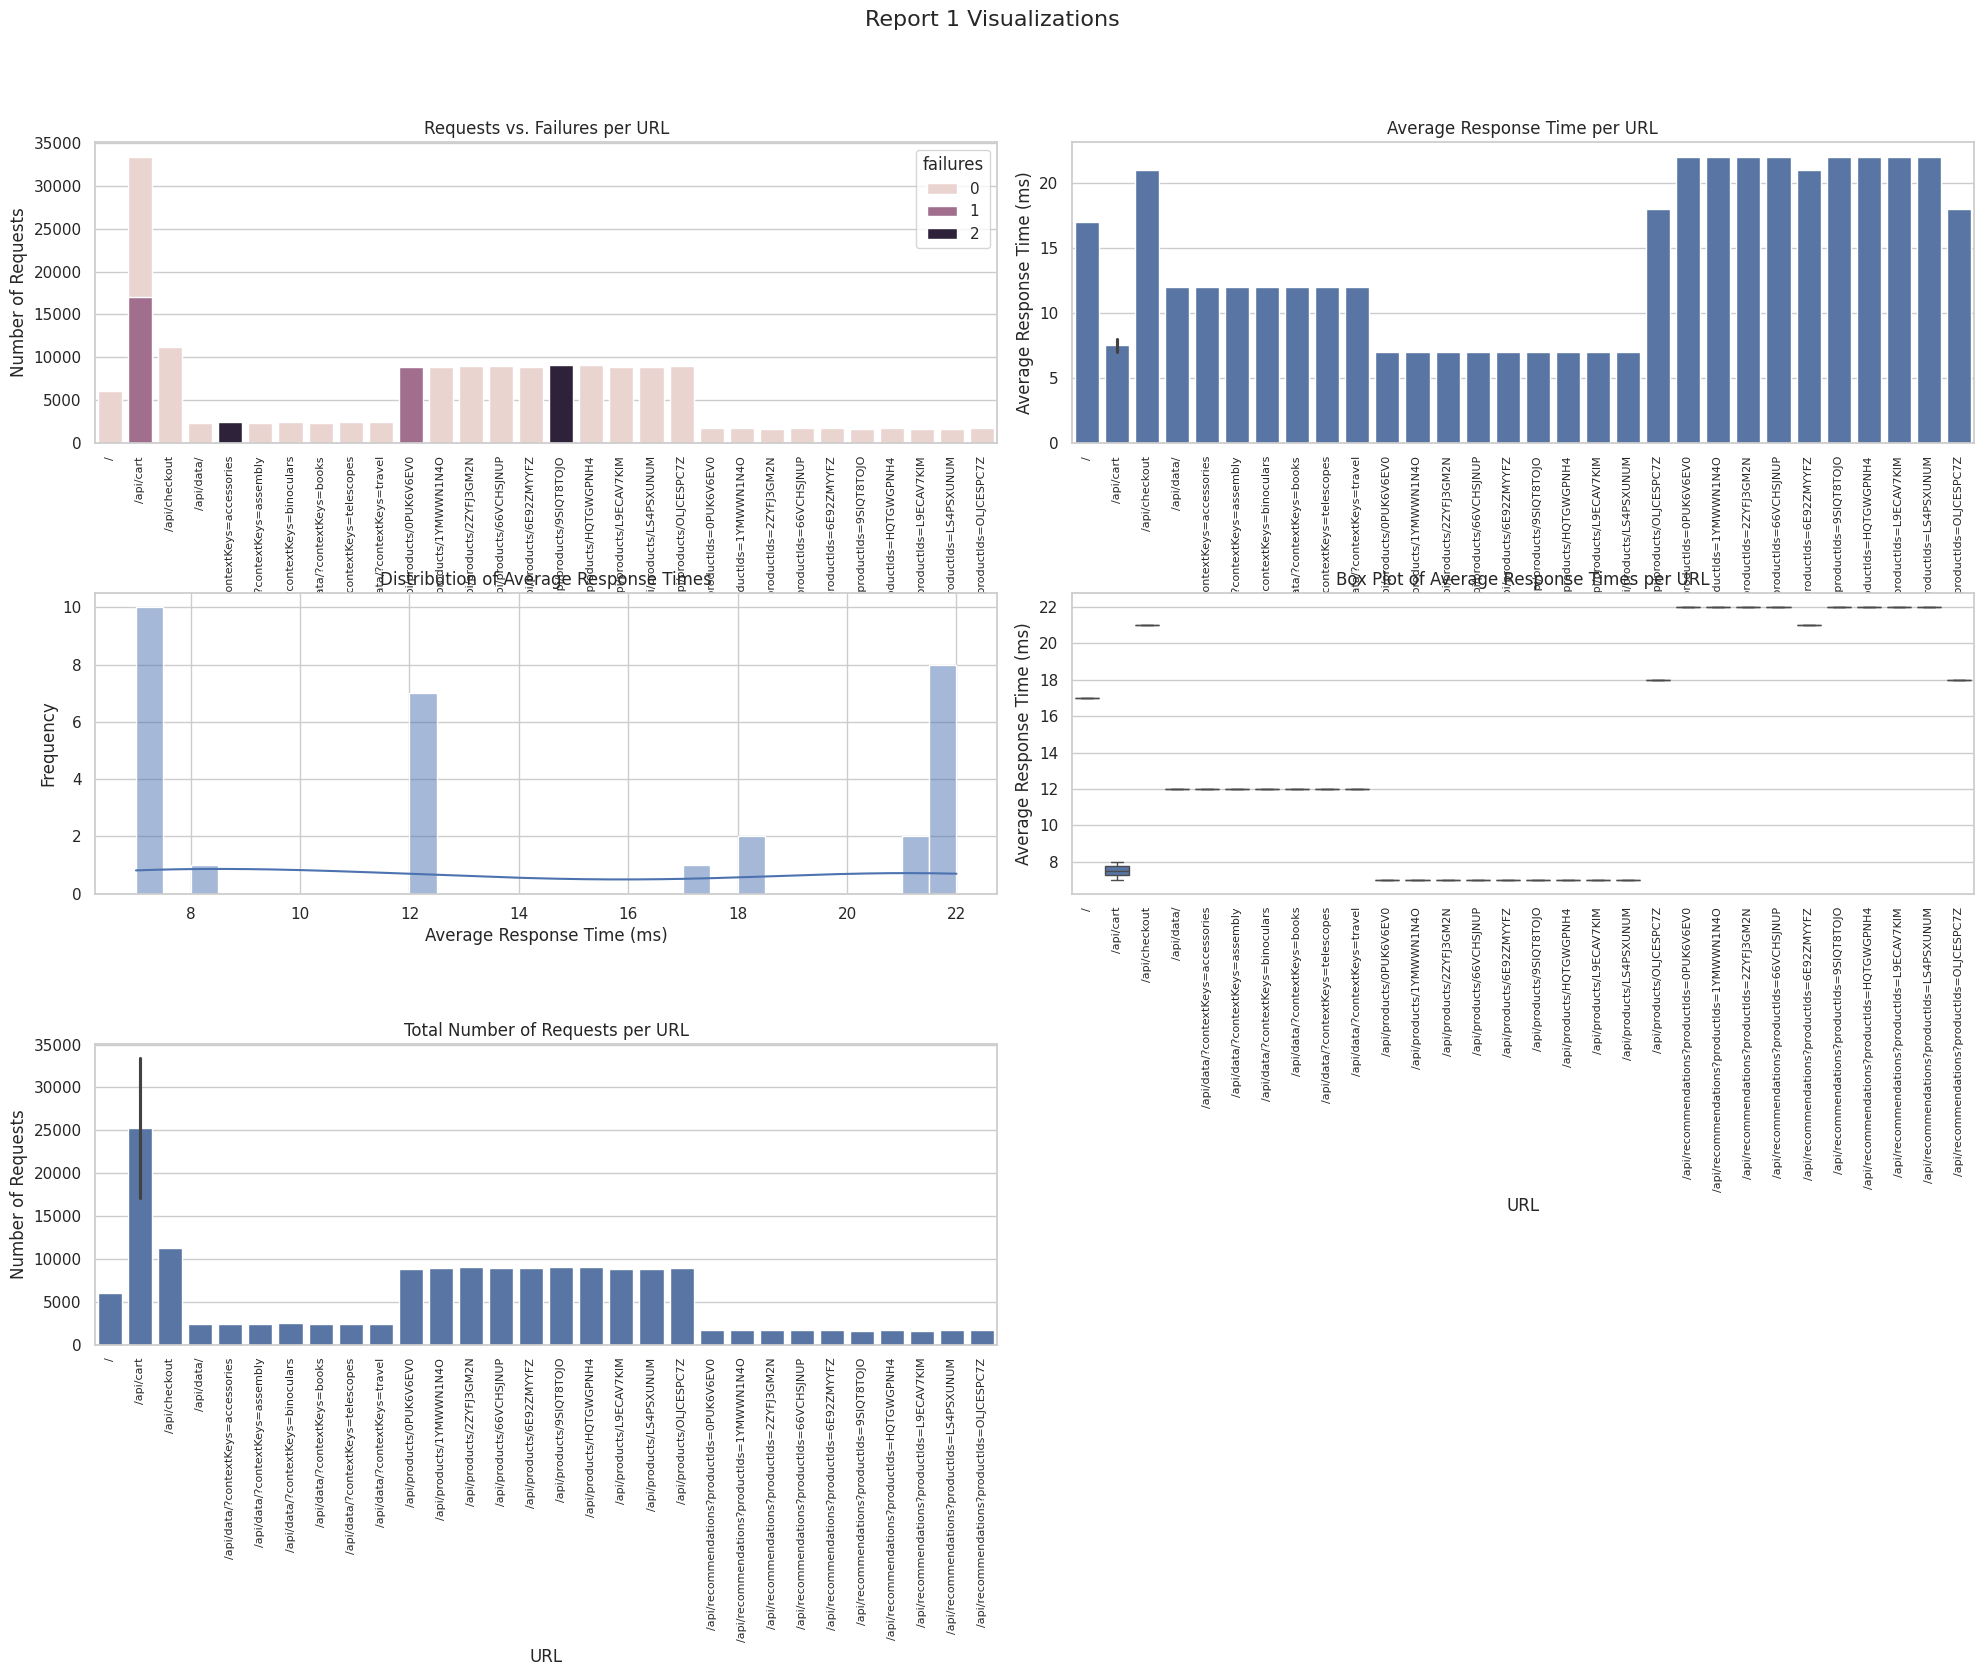

     run_key           task_id                                         url  \
0   32902b0c  a7c1e54f0859496a                                           /   
1   32902b0c  881a5df0e7df4c92                    /api/products/66VCHSJNUP   
2   32902b0c  8455e6681c0141d1                    /api/products/0PUK6V6EV0   
3   32902b0c  e6613bdf1adf456d                    /api/products/LS4PSXUNUM   
4   32902b0c  4f1bfc3142f542a2                    /api/products/2ZYFJ3GM2N   
5   32902b0c  e8a3f80b7f28436b                    /api/products/L9ECAV7KIM   
6   32902b0c  8022b3c5357943e2  /api/recommendations?productIds=1YMWWN1N4O   
7   32902b0c  6e4ca784d259439e                                   /api/cart   
8   32902b0c  d616bd5adc464d4d                    /api/products/6E92ZMYYFZ   
9   32902b0c  cc40843b6e1b4736           /api/data/?contextKeys=telescopes   
10  32902b0c  bc573c94f8c54fd3                               /api/checkout   
11  32902b0c  de36de69768540d9                    /api/products/

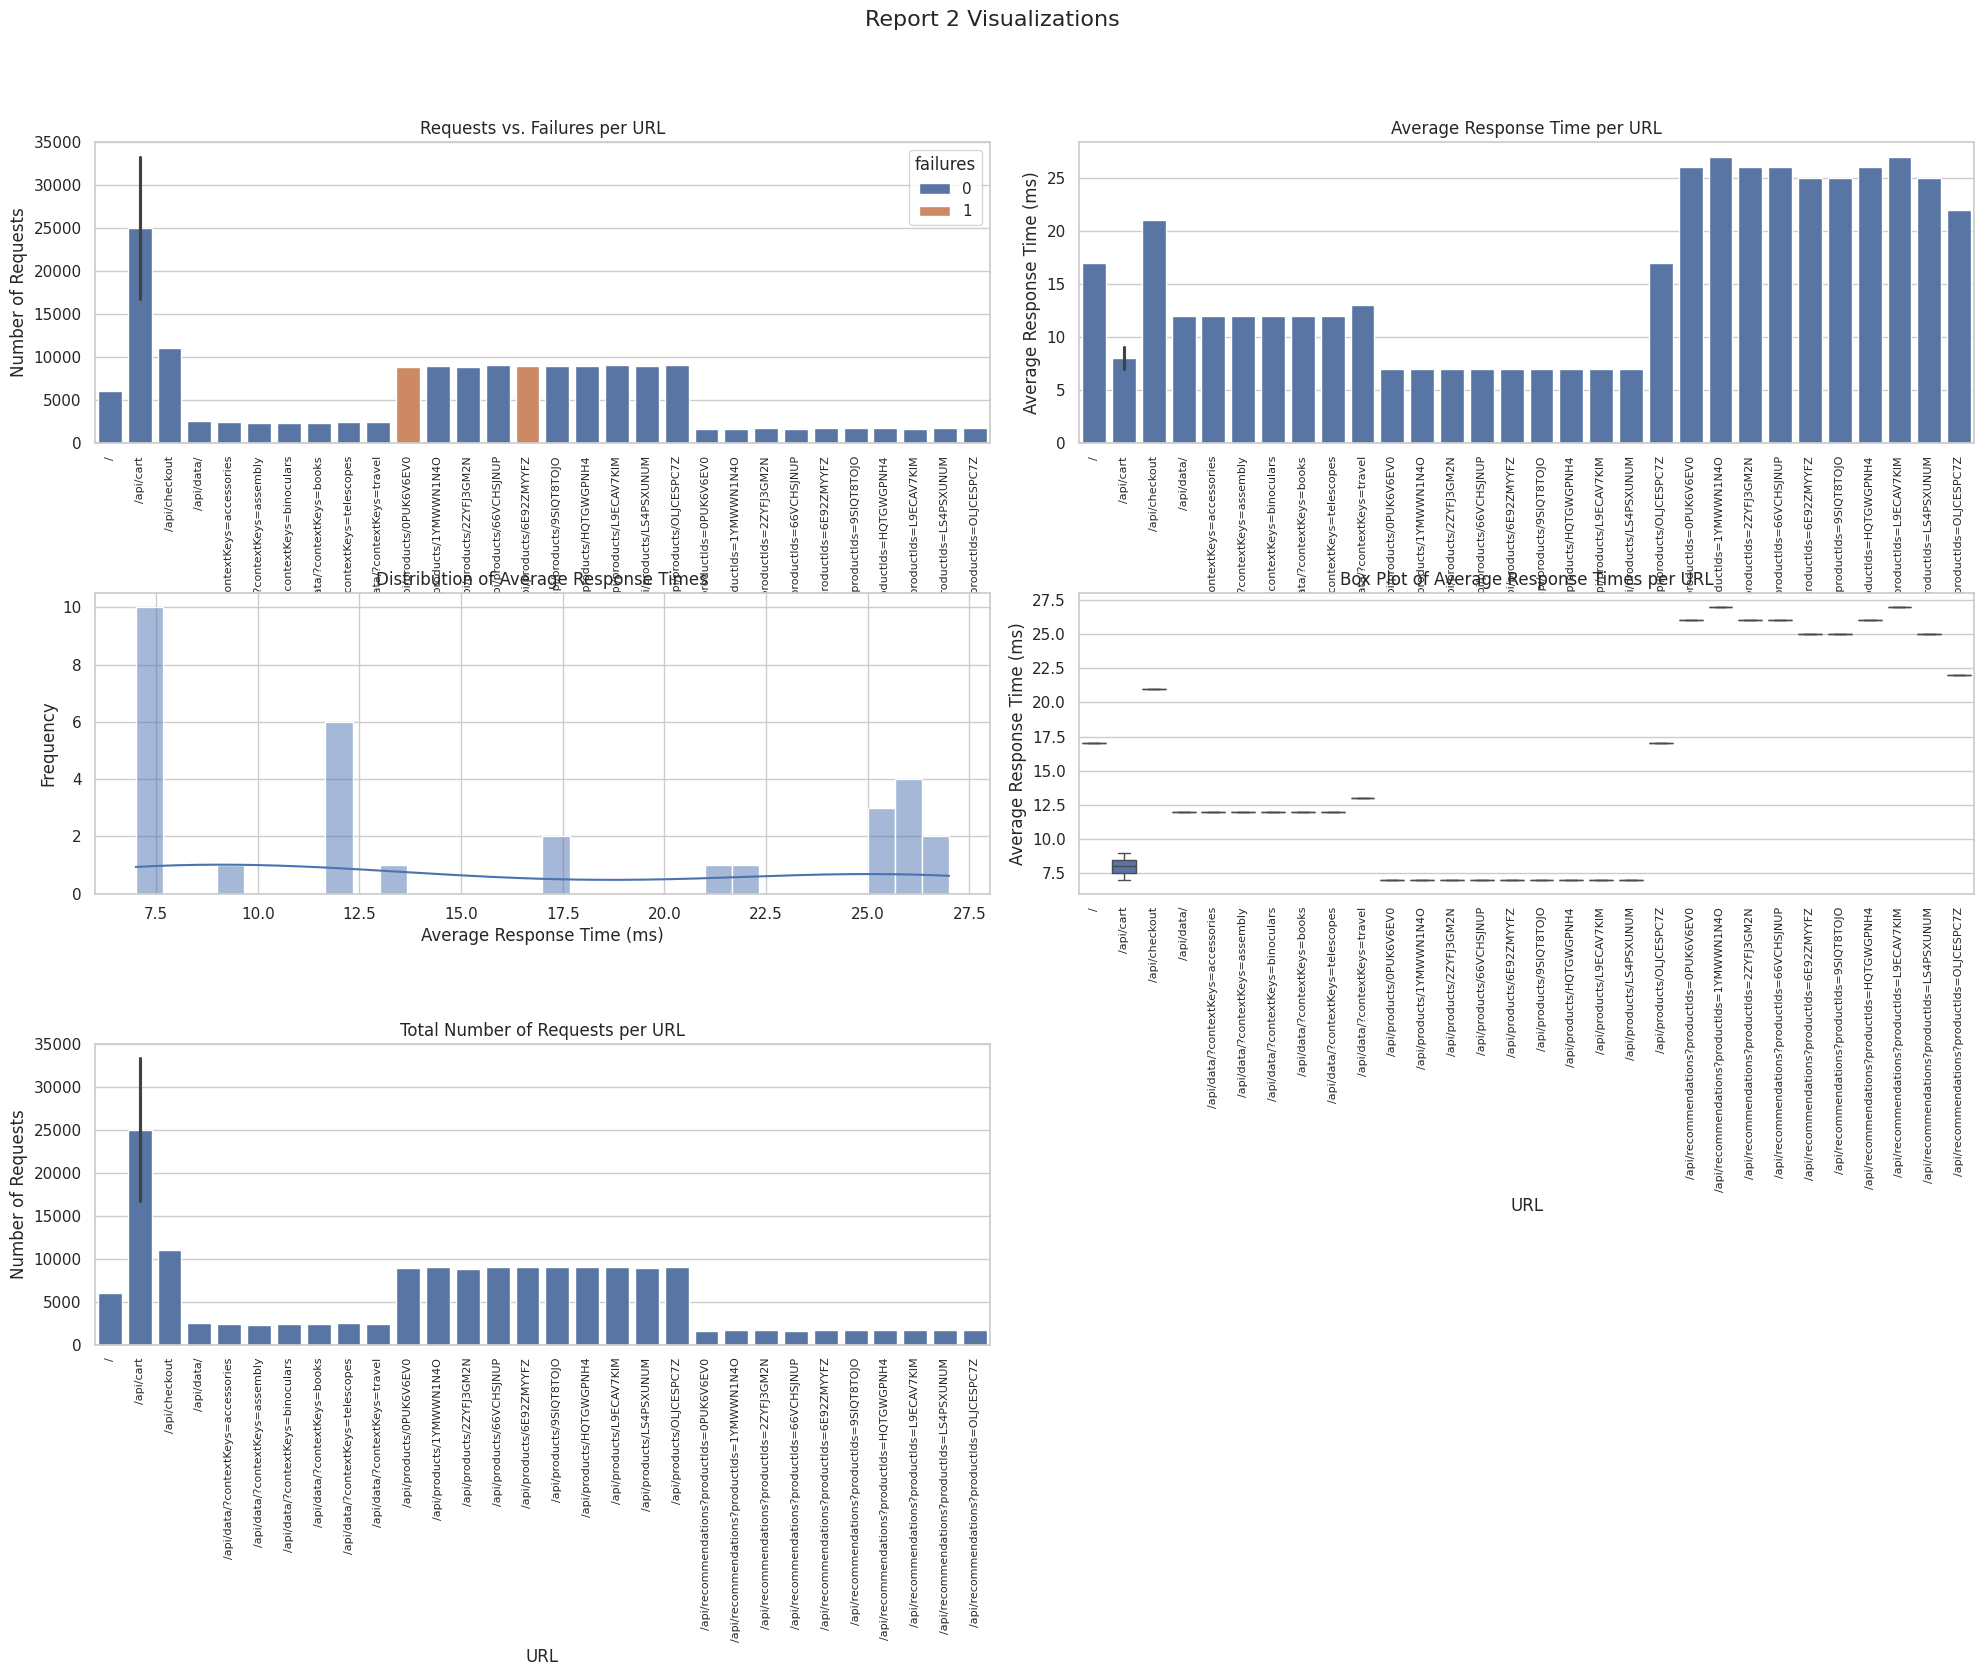

     run_key           task_id                                         url  \
0   1df3f3e8  436cca92580f4f07                                           /   
1   1df3f3e8  afeed7edcb9d4cdc                    /api/products/66VCHSJNUP   
2   1df3f3e8  e070c2d71e9b4114                    /api/products/L9ECAV7KIM   
3   1df3f3e8  a8ed57d0bcbe45ac                    /api/products/HQTGWGPNH4   
4   1df3f3e8  7f18943db48b4c7d                    /api/products/LS4PSXUNUM   
5   1df3f3e8  44083ebe76fc4b44                    /api/products/0PUK6V6EV0   
6   1df3f3e8  c7659a2359df40d4                    /api/products/9SIQT8TOJO   
7   1df3f3e8  cae200c910fd474b  /api/recommendations?productIds=1YMWWN1N4O   
8   1df3f3e8  42d6a4a80bfa47a0                                   /api/cart   
9   1df3f3e8  ffe9d4a135d54ec3                                   /api/cart   
10  1df3f3e8  19fd1102ff534acf                    /api/products/6E92ZMYYFZ   
11  1df3f3e8  f26fa74f820c48d8                               /ap

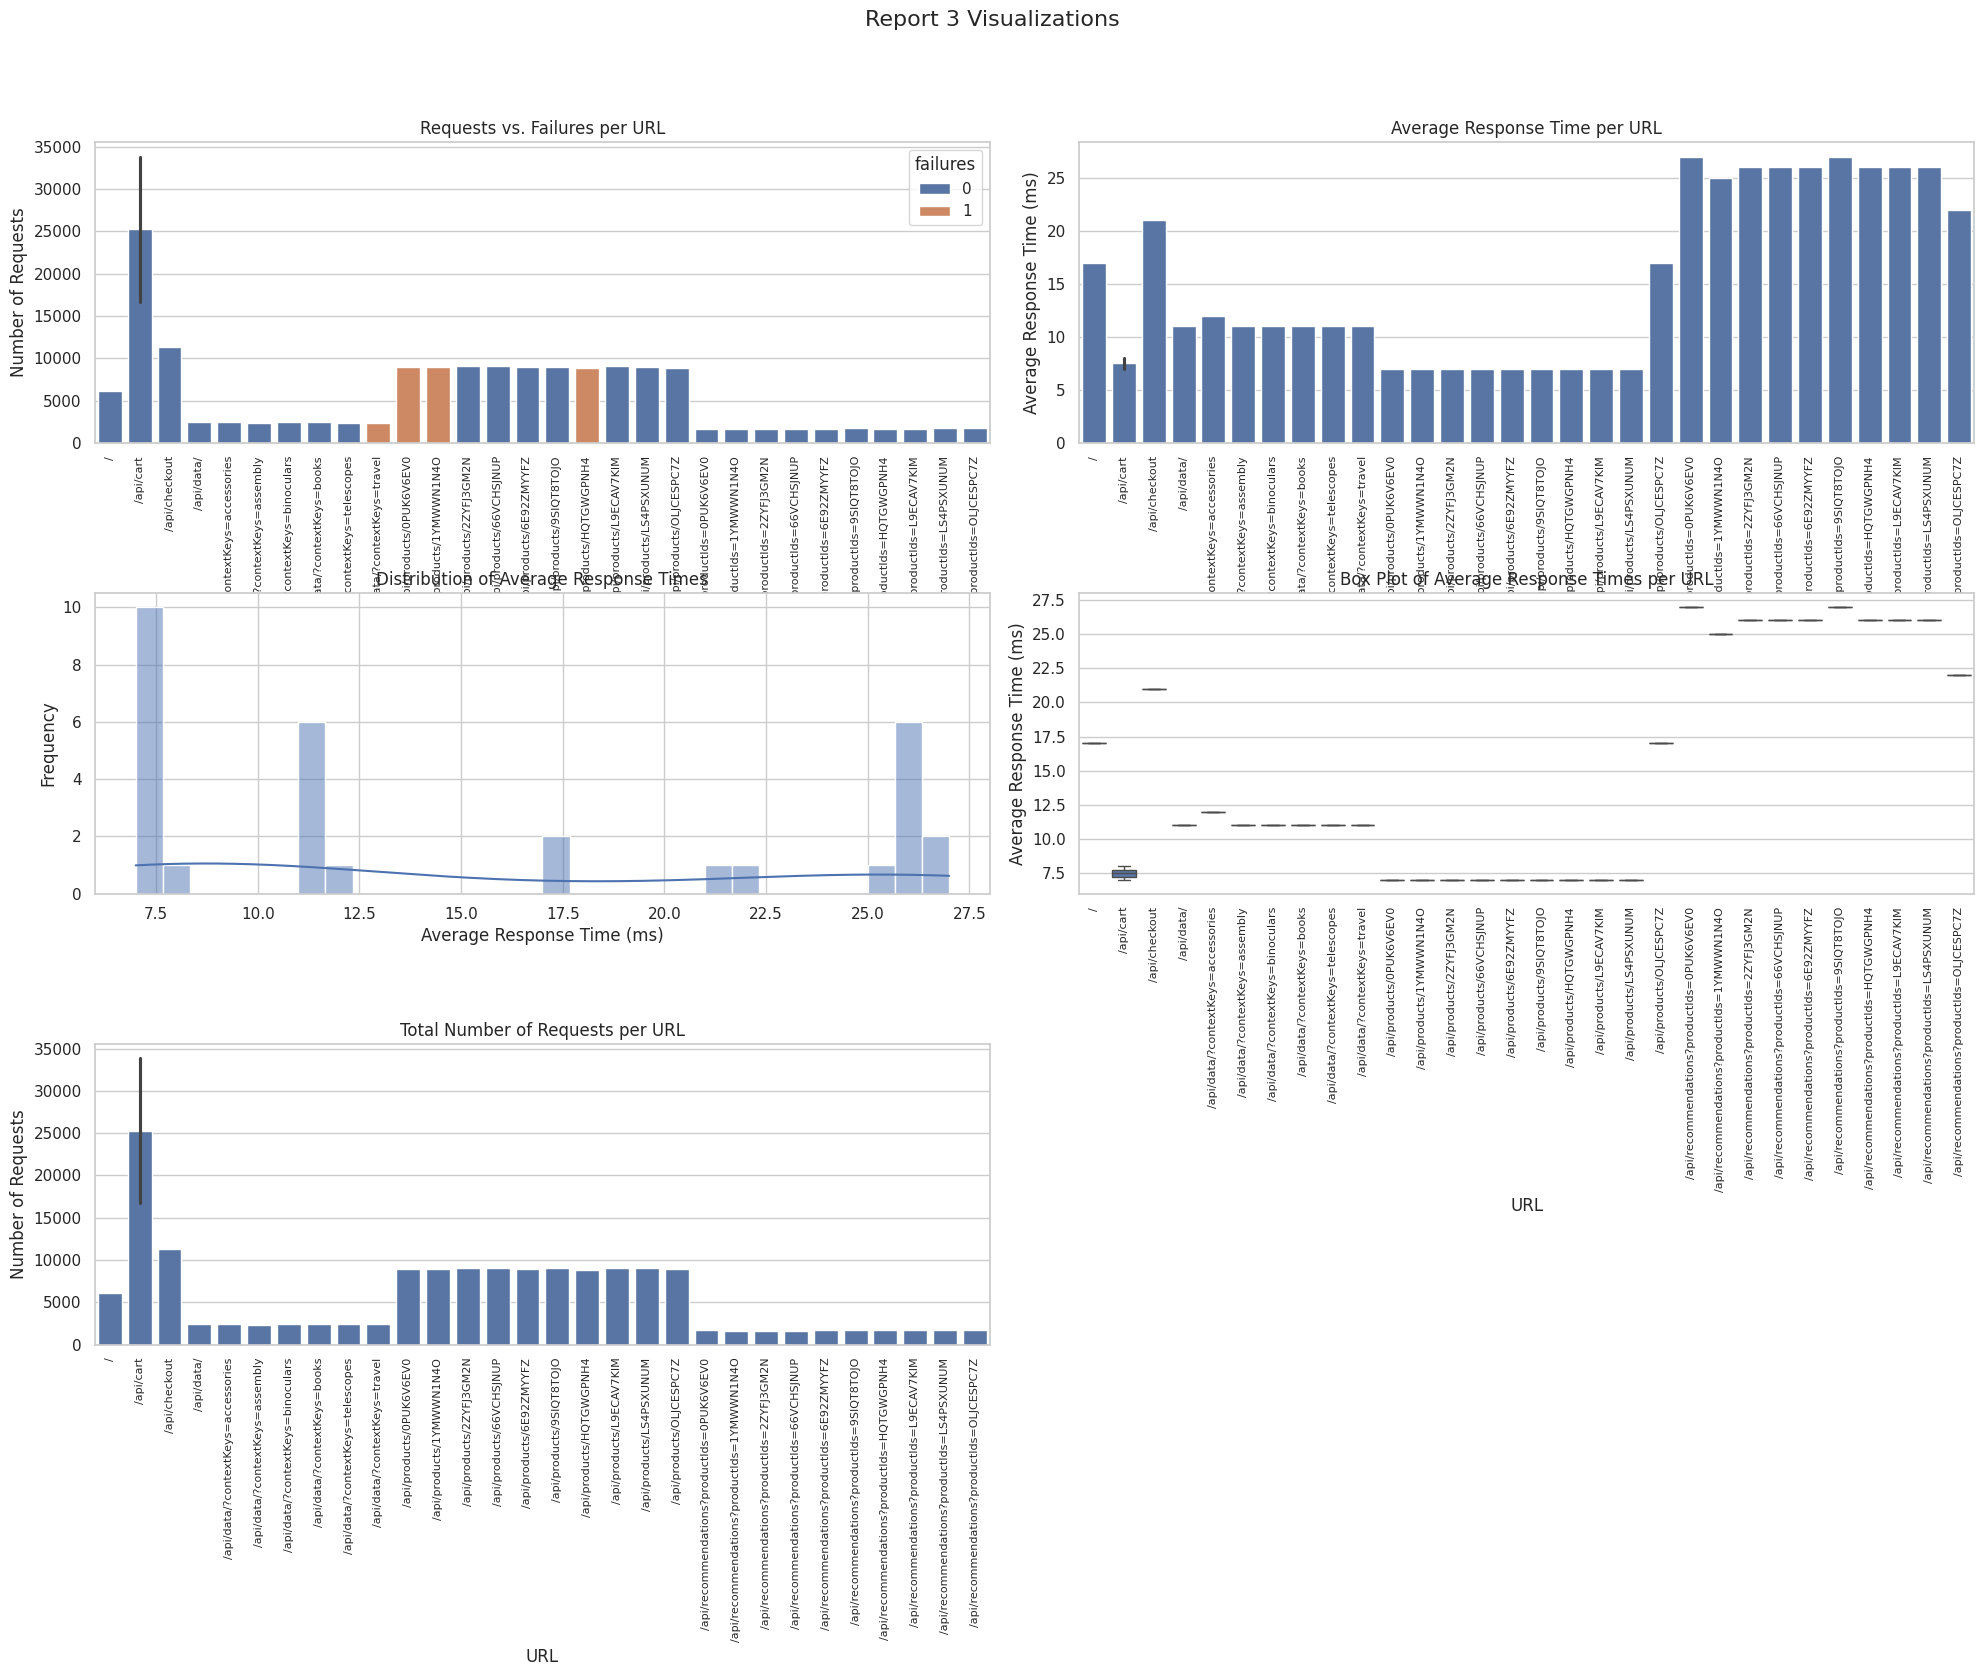

     run_key           task_id                                         url  \
0   131e2cce  9ef27045f5254dc4                                           /   
1   131e2cce  1434e3d3993f4f56                    /api/products/L9ECAV7KIM   
2   131e2cce  524f7f837a21439c                    /api/products/6E92ZMYYFZ   
3   131e2cce  acab3aa6e7f2441d                    /api/products/LS4PSXUNUM   
4   131e2cce  8a577ec83d1644ea                    /api/products/1YMWWN1N4O   
5   131e2cce  2f6661f8f5214d2d                    /api/products/9SIQT8TOJO   
6   131e2cce  eea2f7c951b9465d                                   /api/cart   
7   131e2cce  8386f1dab06249d0                                   /api/cart   
8   131e2cce  cb0ea5983727490f           /api/data/?contextKeys=telescopes   
9   131e2cce  ca74d18c4123419f                    /api/products/0PUK6V6EV0   
10  131e2cce  ef98e300a9a449fe                /api/data/?contextKeys=books   
11  131e2cce  91ba8d2156424d84  /api/recommendations?productIds=

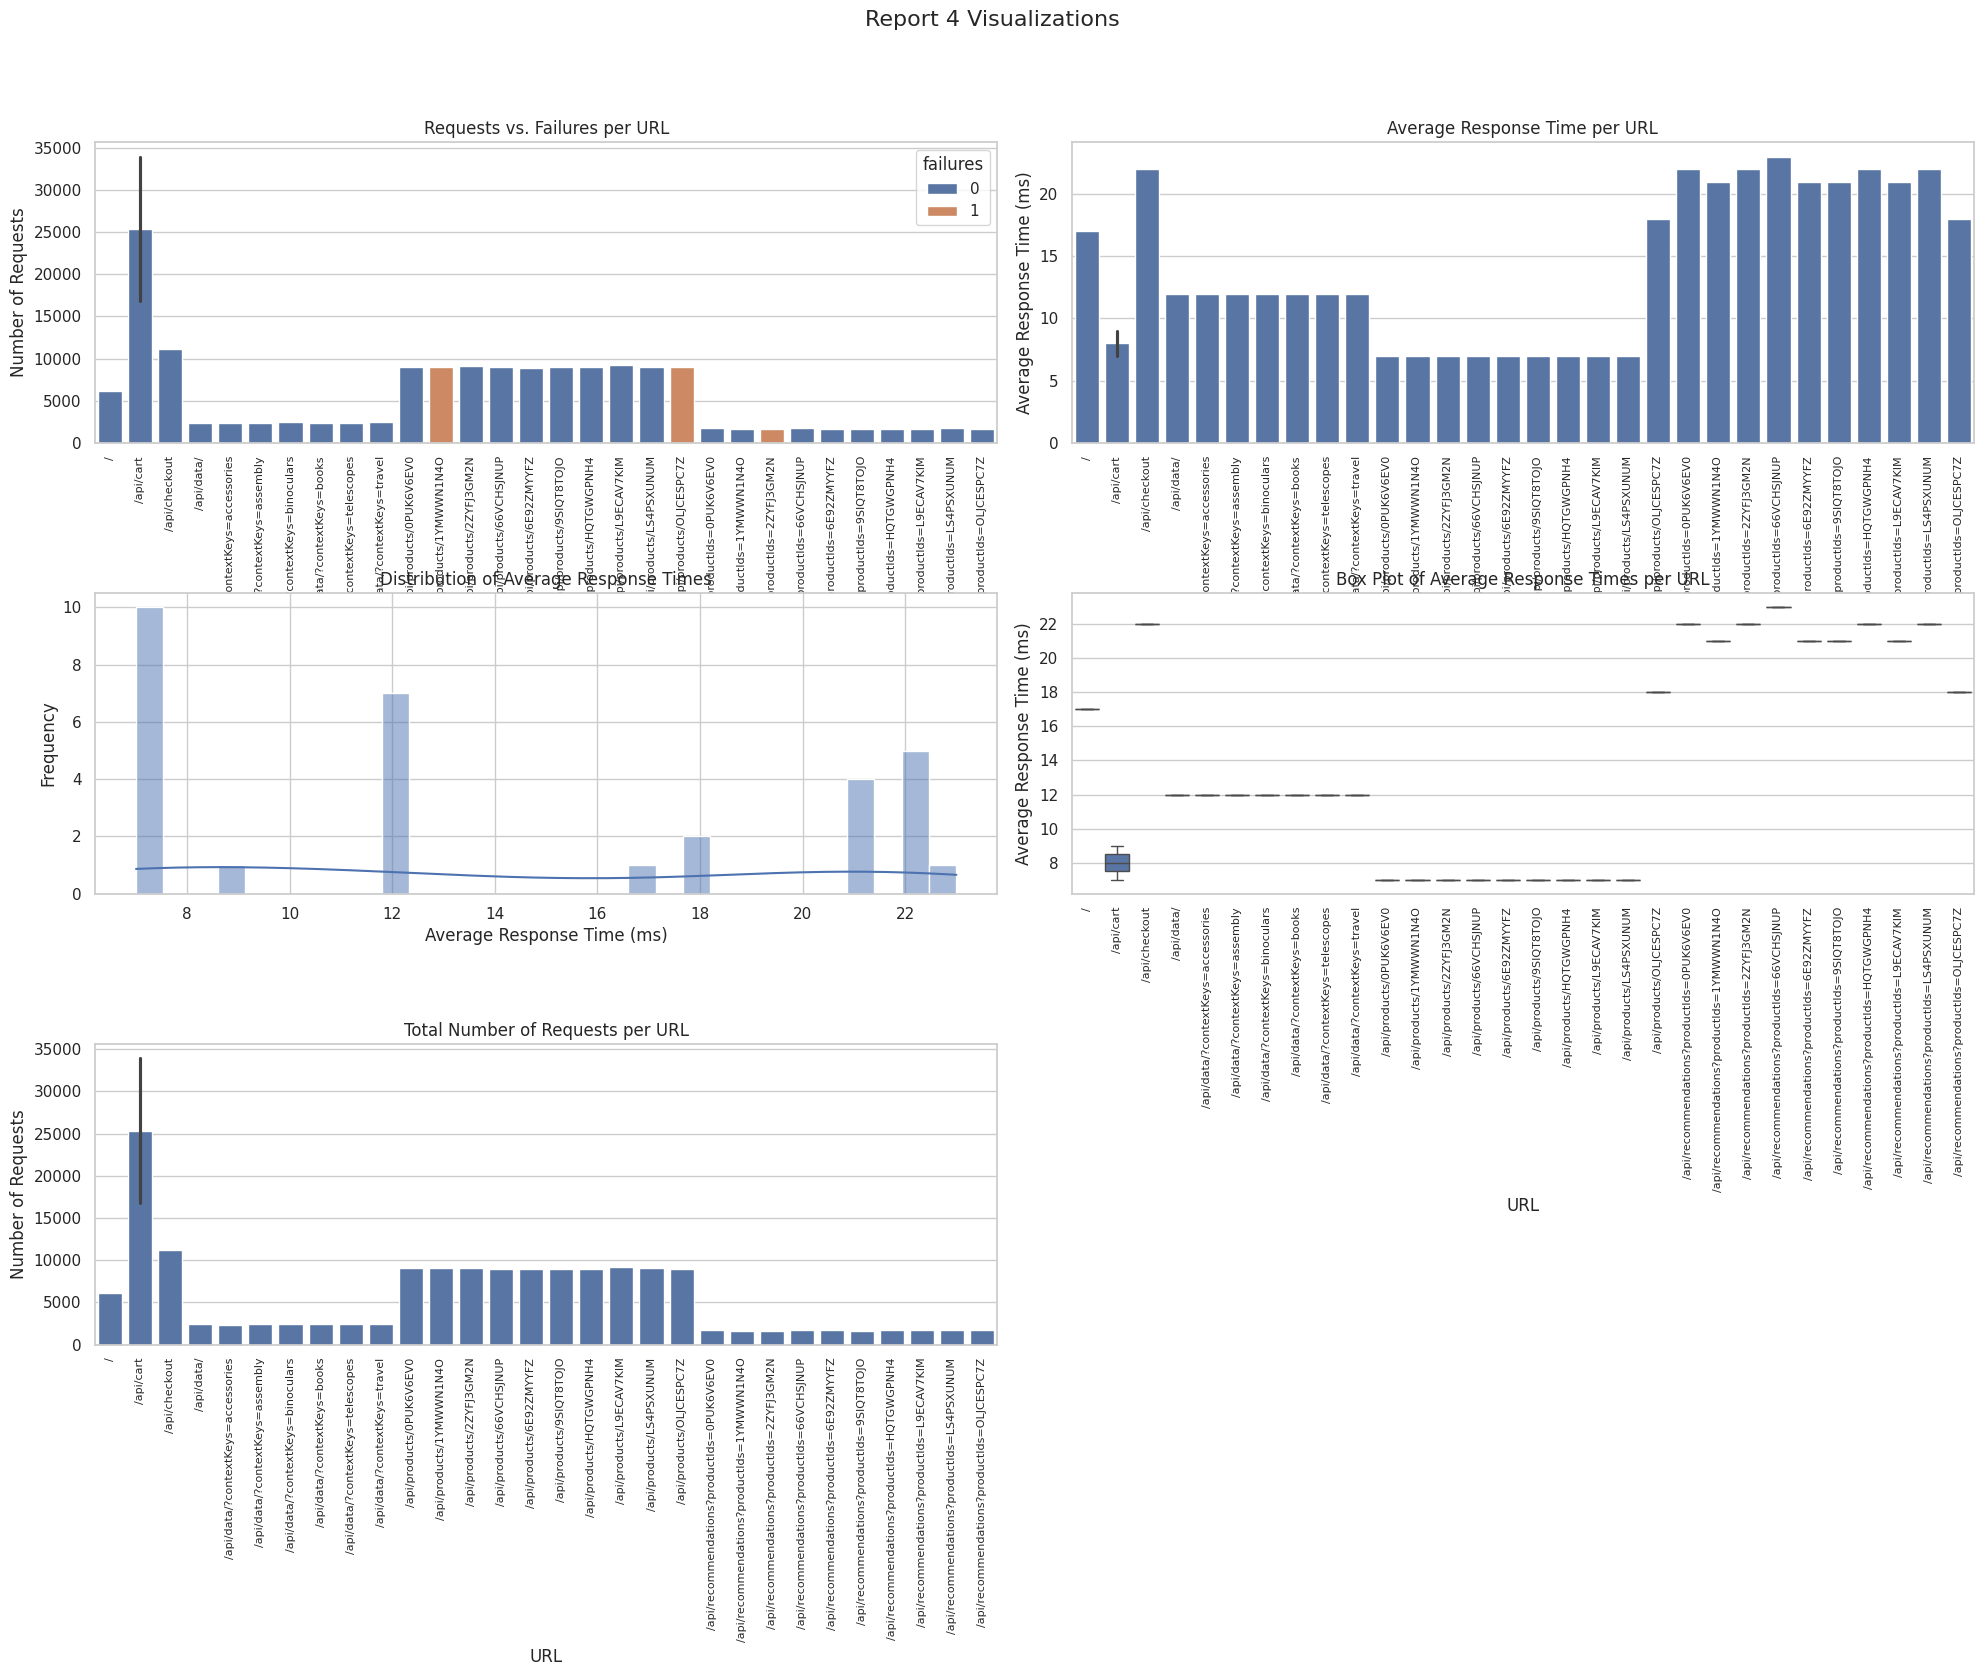

     run_key           task_id                                         url  \
0   677b4b15  8448d0fb306e4f99                                           /   
1   677b4b15  e591bd4ab0494e50                    /api/products/LS4PSXUNUM   
2   677b4b15  c3b68a6977e54424                    /api/products/2ZYFJ3GM2N   
3   677b4b15  b954d0c0cfe54087                    /api/products/66VCHSJNUP   
4   677b4b15  d9f9e5805c0c4fef                    /api/products/HQTGWGPNH4   
5   677b4b15  68fd0557b3194df7  /api/recommendations?productIds=0PUK6V6EV0   
6   677b4b15  2cabd408095c4ecd  /api/recommendations?productIds=9SIQT8TOJO   
7   677b4b15  78647d26c4a8441f                                   /api/cart   
8   677b4b15  01ad5619be8f4079                                   /api/cart   
9   677b4b15  4a292a9959254bf7             /api/data/?contextKeys=assembly   
10  677b4b15  c615580a87af4933  /api/recommendations?productIds=1YMWWN1N4O   
11  677b4b15  57919c54bda742b9                    /api/products/

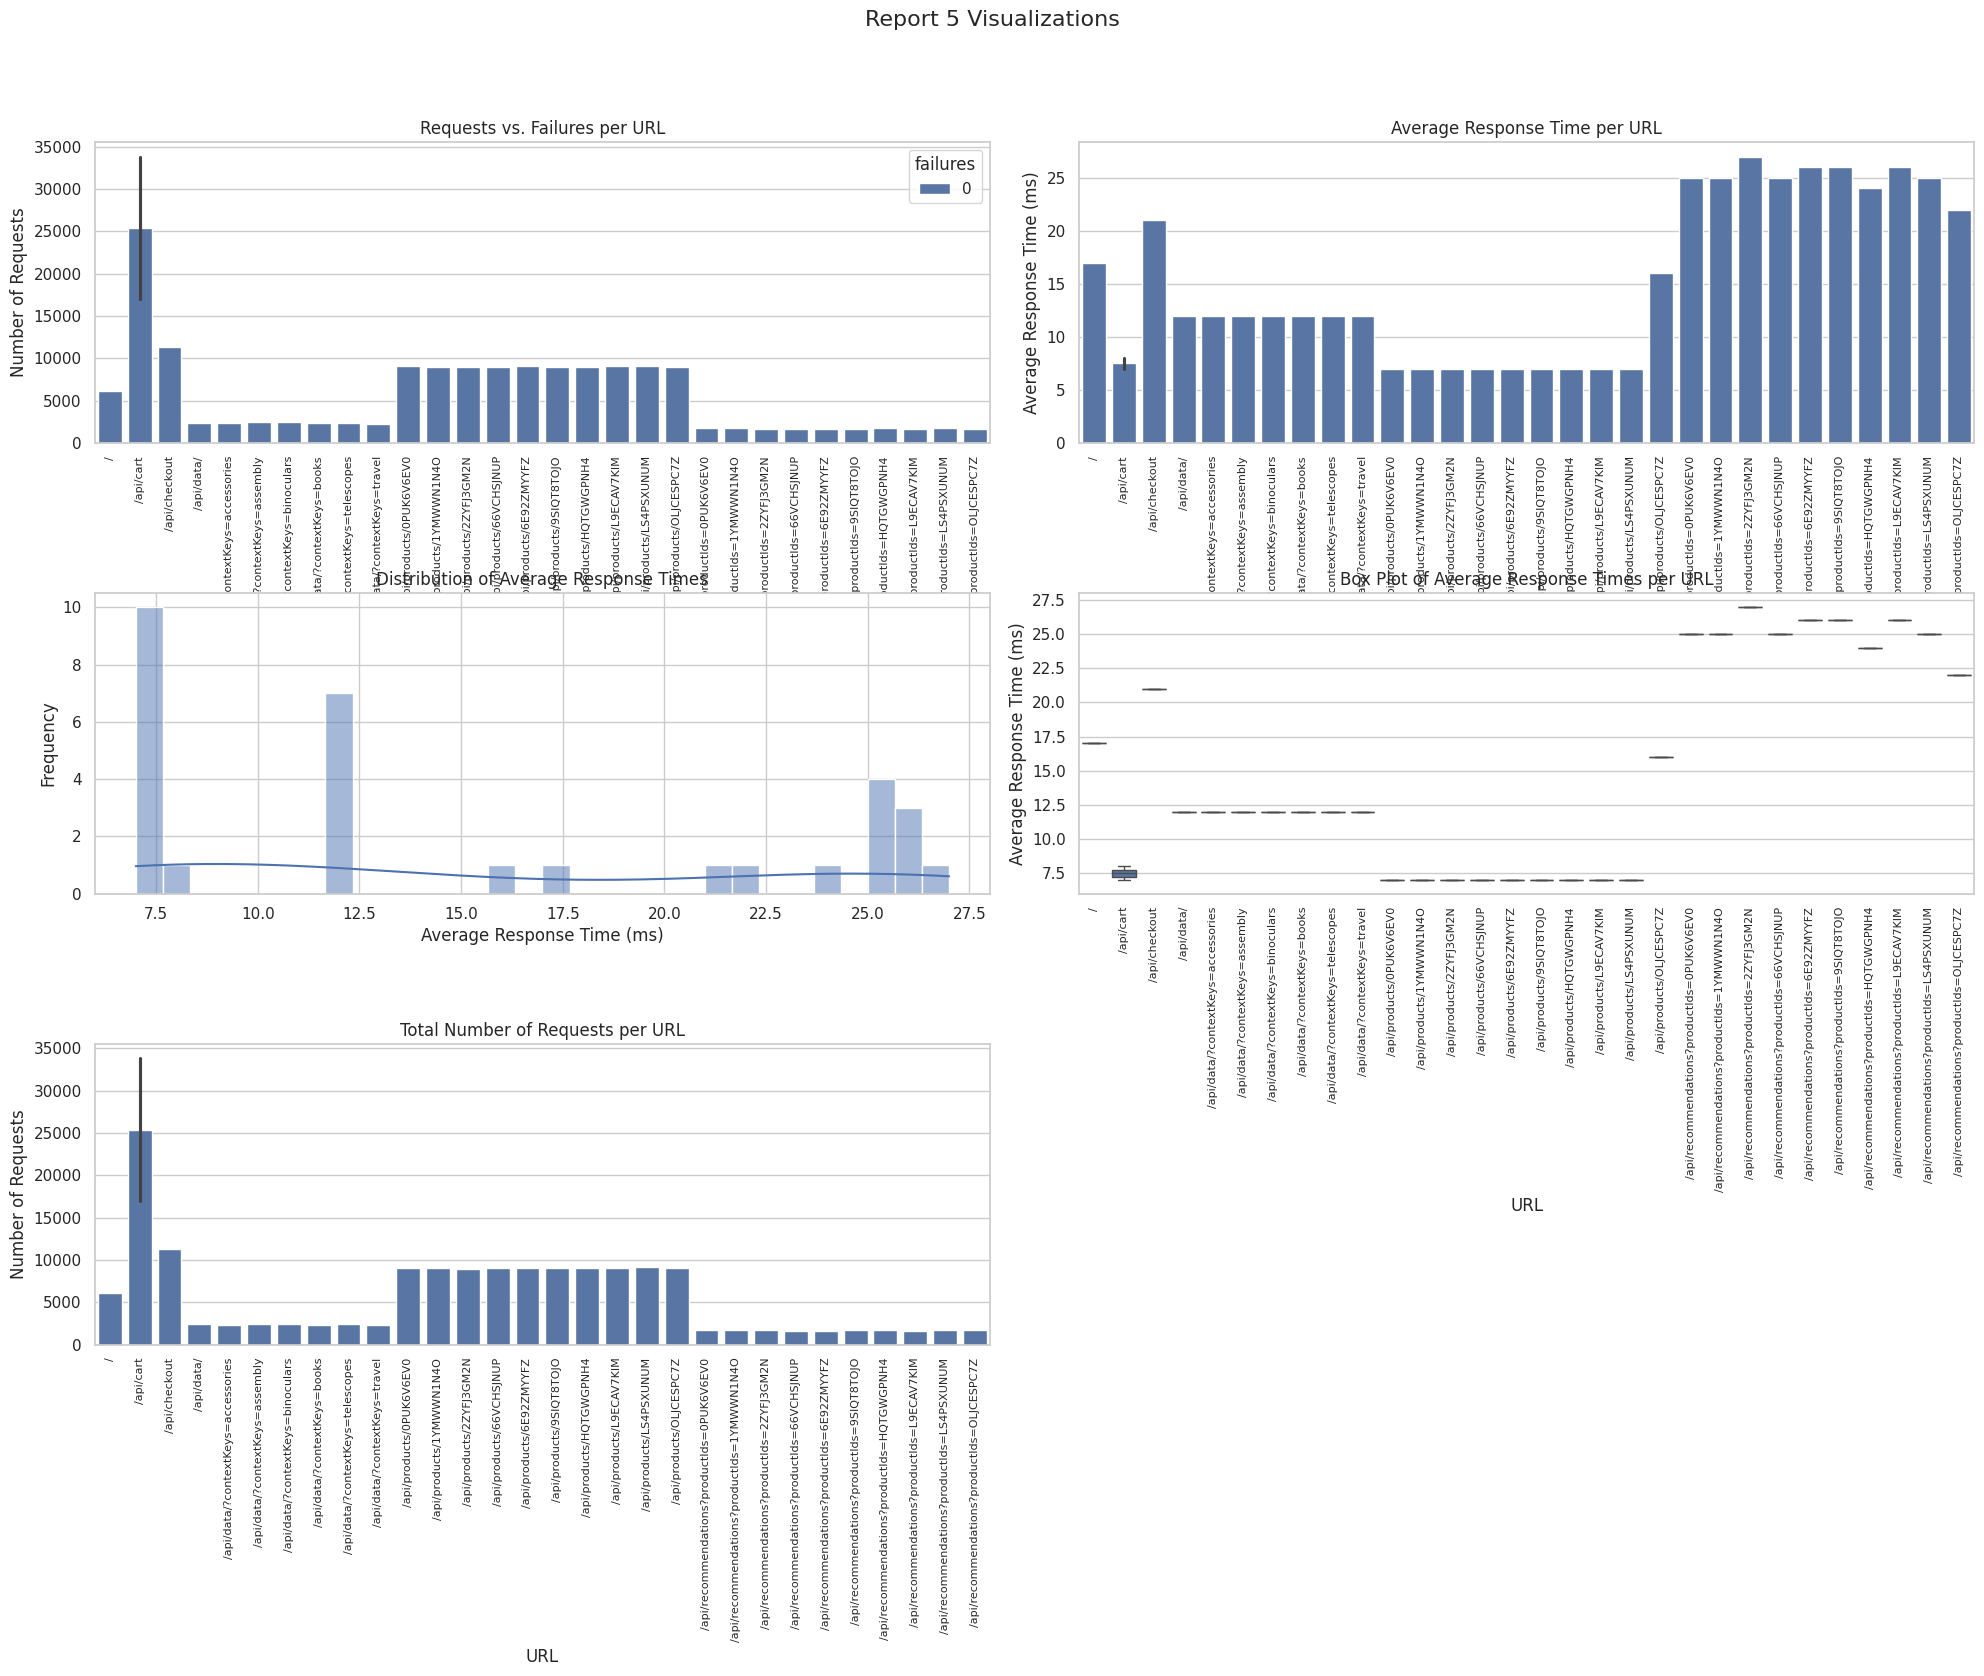

     run_key           task_id                                         url  \
0   f7fa4532  c90d36a3fcf845a4                                           /   
1   f7fa4532  b169ce9e745d4671                    /api/products/66VCHSJNUP   
2   f7fa4532  15f0bd35ab164f91                    /api/products/6E92ZMYYFZ   
3   f7fa4532  80c310b64e404bff                    /api/products/2ZYFJ3GM2N   
4   f7fa4532  1dcfbed7bd854449  /api/recommendations?productIds=HQTGWGPNH4   
5   f7fa4532  567ec80055314a37                    /api/products/9SIQT8TOJO   
6   f7fa4532  db4d5643e01a48cc                                   /api/cart   
7   f7fa4532  42ee72533d2f4b02                                   /api/cart   
8   f7fa4532  b5d3cf6a3e394529                /api/data/?contextKeys=books   
9   f7fa4532  301098efe5c34e36                               /api/checkout   
10  f7fa4532  6c0f9a4c6f514b7e                    /api/products/1YMWWN1N4O   
11  f7fa4532  5f2fdea7e3284d31  /api/recommendations?productIds=

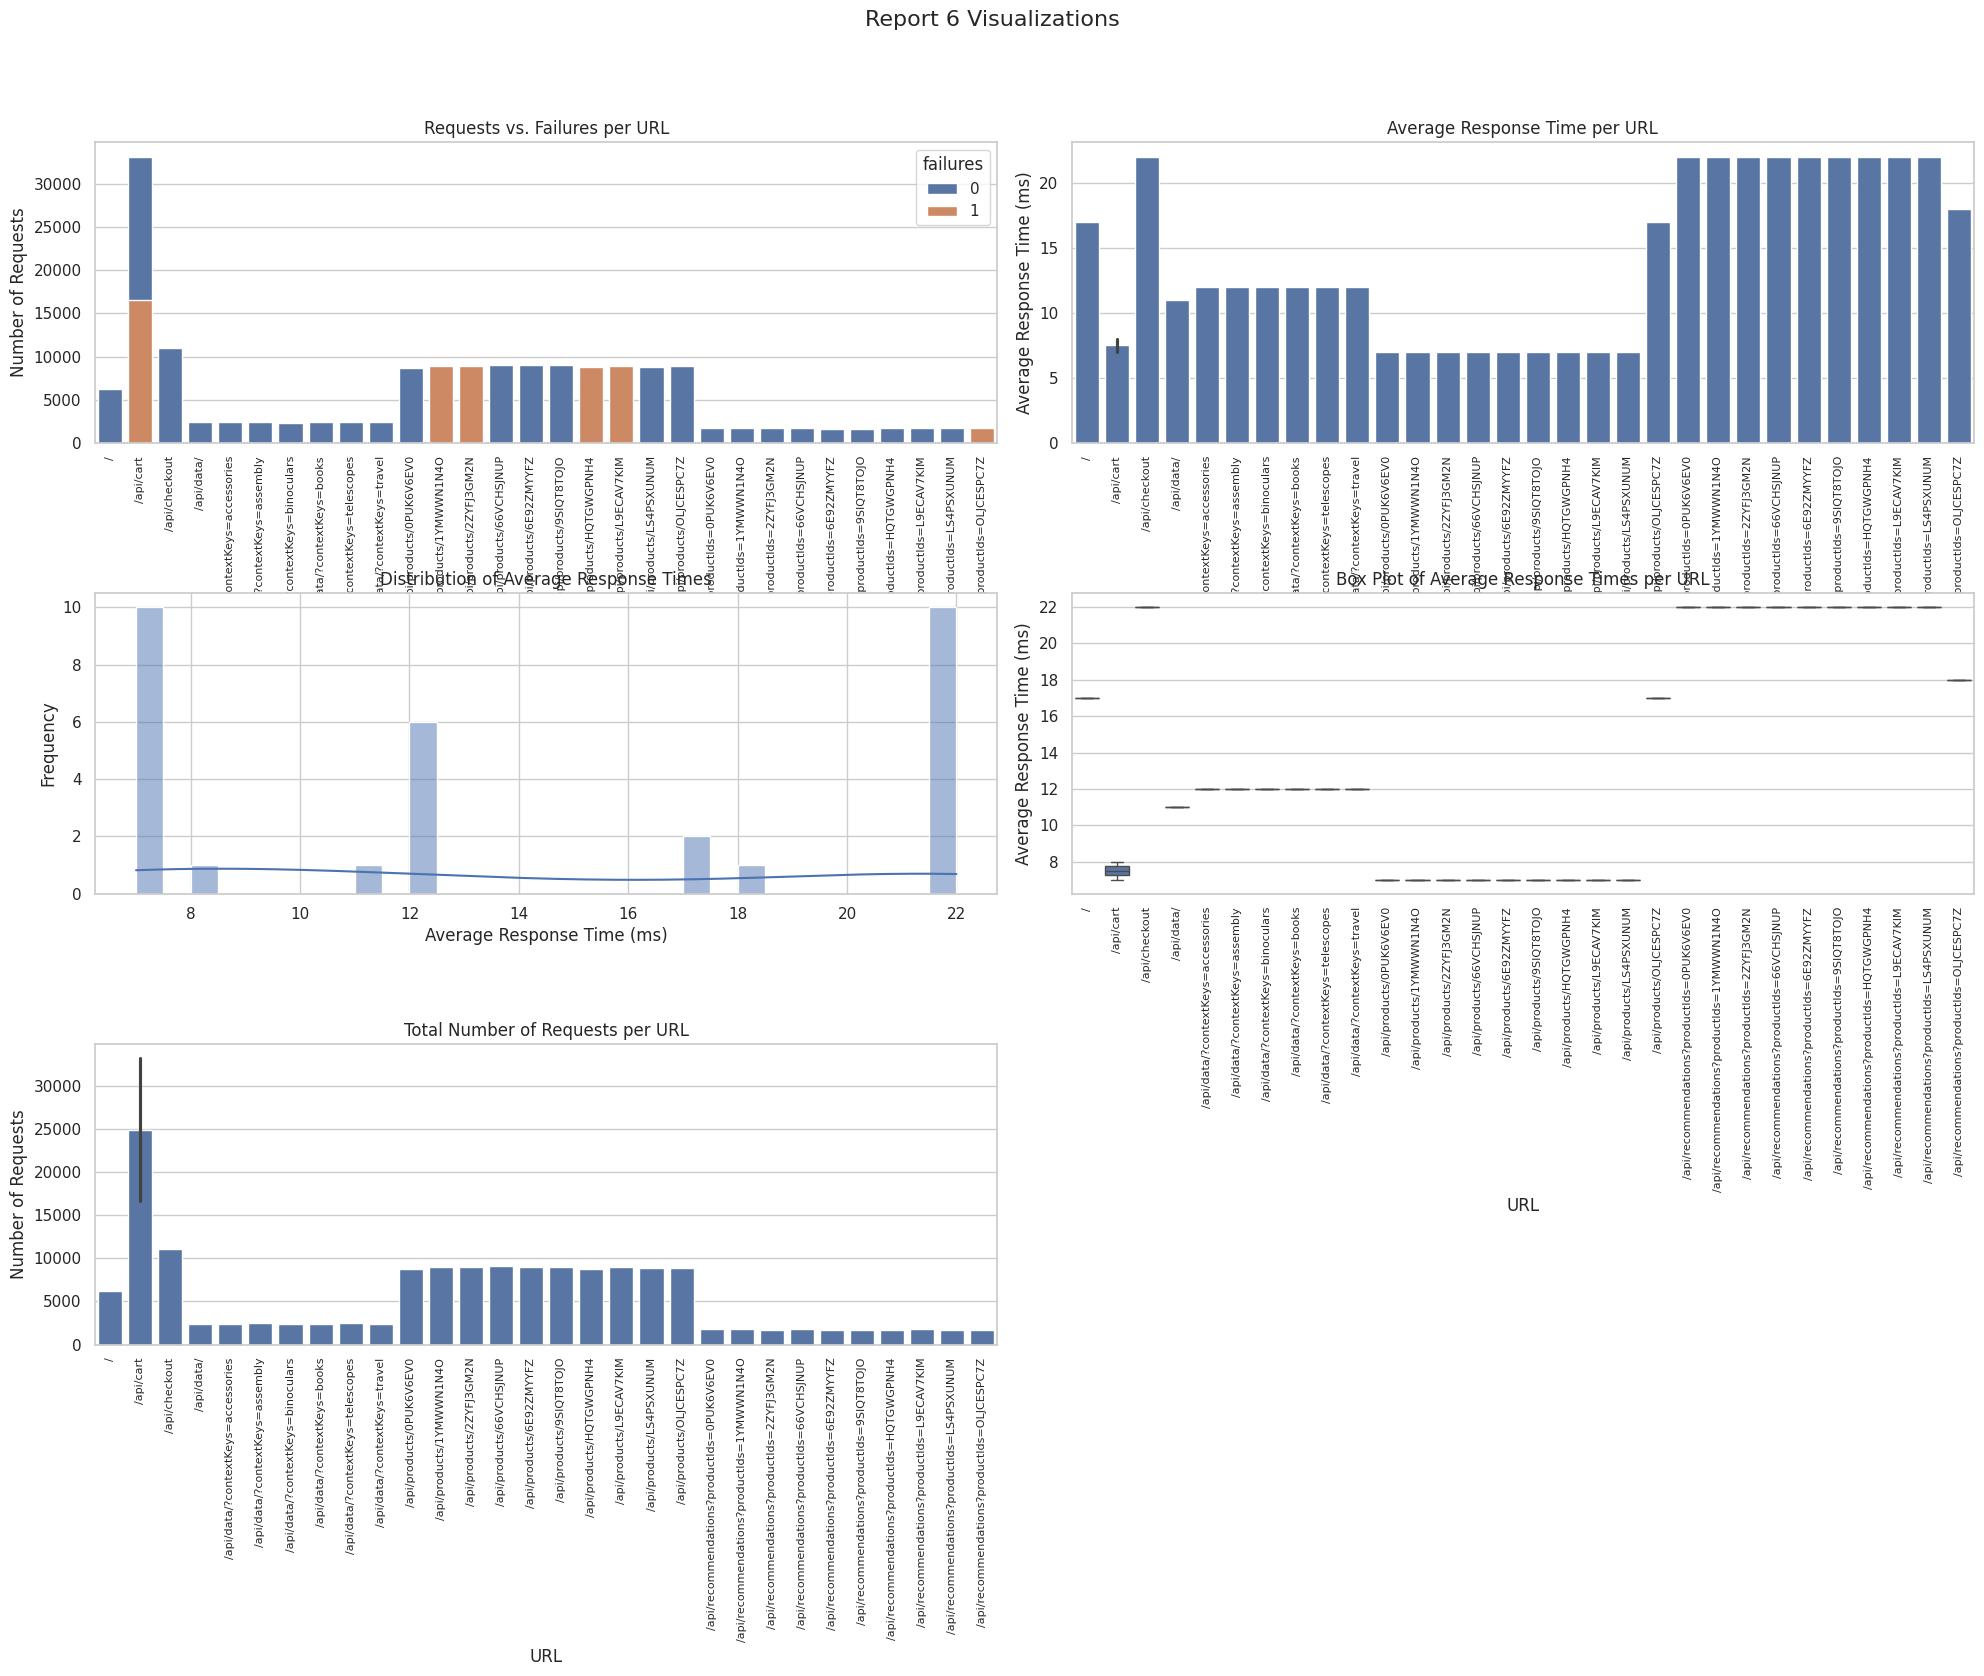

     run_key           task_id                                         url  \
0   867a8cd5  6cfe8e0060b14128                                           /   
1   867a8cd5  bcfc0365ade14fe0                    /api/products/6E92ZMYYFZ   
2   867a8cd5  7431d7777ff148b2                    /api/products/LS4PSXUNUM   
3   867a8cd5  84dac889ef964606                    /api/products/HQTGWGPNH4   
4   867a8cd5  d50c222122bf4a4c                    /api/products/2ZYFJ3GM2N   
5   867a8cd5  a13e17f1315c4ba3                    /api/products/9SIQT8TOJO   
6   867a8cd5  b4bd59b04906484e  /api/recommendations?productIds=L9ECAV7KIM   
7   867a8cd5  e11806045c8c4463  /api/recommendations?productIds=2ZYFJ3GM2N   
8   867a8cd5  342b337d4e674122                                   /api/cart   
9   867a8cd5  6010d54a48ff4524          /api/data/?contextKeys=accessories   
10  867a8cd5  f8cadf3094c24932                    /api/products/0PUK6V6EV0   
11  867a8cd5  715d0f99d27e47da  /api/recommendations?productIds=

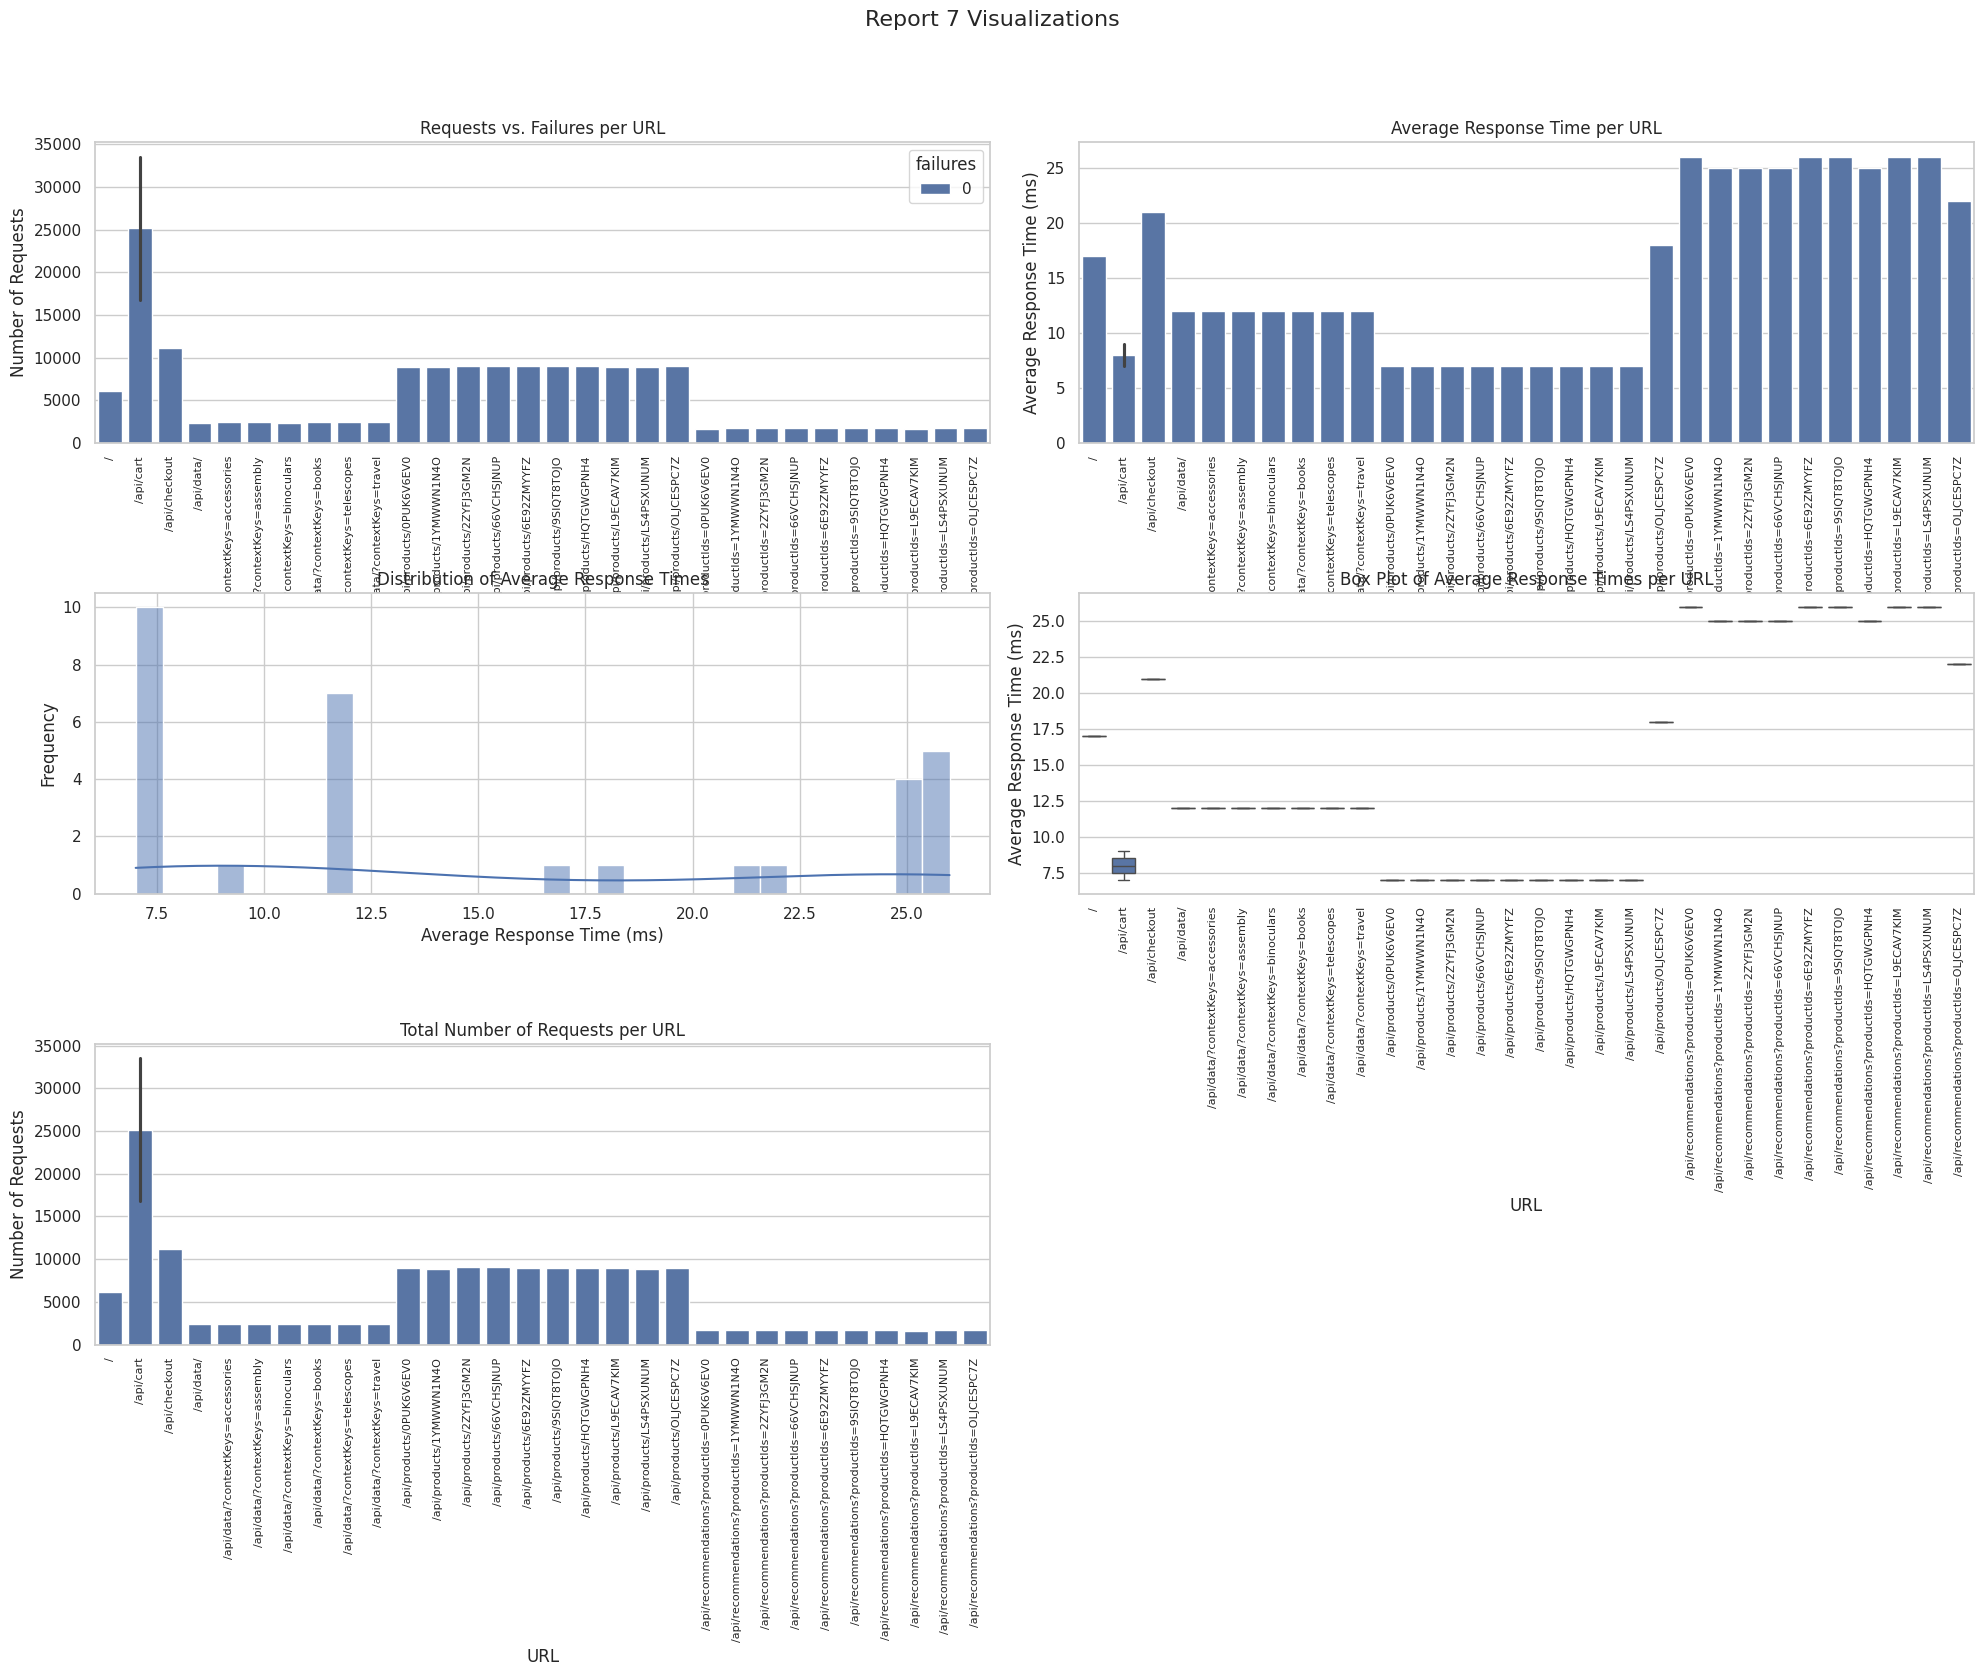

In [5]:
print(reports)

# Set the style of seaborn for better visualizations
sns.set_theme(style="whitegrid")


for idx, report in enumerate(reports):
    loadgen_data = report.loadgen_data

    print(loadgen_data)

    # Sort the URLs
    sorted_urls = sorted(loadgen_data['url'].unique())

    # Create a grid for visualizations for each report
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))
    fig.suptitle(f'Report {idx + 1} Visualizations', fontsize=16)

    # Visualization 1: Requests vs. Failures per URL
    sns.barplot(data=loadgen_data, x='url', y='requests', hue='failures', dodge=False, order=sorted_urls, ax=axes[0, 0])
    axes[0, 0].set_title('Requests vs. Failures per URL')
    axes[0, 0].set_xlabel('URL')
    axes[0, 0].set_ylabel('Number of Requests')
    axes[0, 0].tick_params(axis='x', rotation=90, labelsize=8)

    # Visualization 2: Average Response Time for Each URL
    sns.barplot(data=loadgen_data, x='url', y='median_response_time', order=sorted_urls, ax=axes[0, 1])
    axes[0, 1].set_title('Average Response Time per URL')
    axes[0, 1].set_xlabel('URL')
    axes[0, 1].set_ylabel('Average Response Time (ms)')
    axes[0, 1].tick_params(axis='x', rotation=90, labelsize=8)

    # Visualization 3: Distribution of Response Times
    sns.histplot(data=loadgen_data, x='median_response_time', kde=True, bins=30, ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Average Response Times')
    axes[1, 0].set_xlabel('Average Response Time (ms)')
    axes[1, 0].set_ylabel('Frequency')

    # Visualization 4: Response Time Metrics by URL
    sns.boxplot(data=loadgen_data, x='url', y='median_response_time', order=sorted_urls, ax=axes[1, 1])
    axes[1, 1].set_title('Box Plot of Average Response Times per URL')
    axes[1, 1].set_xlabel('URL')
    axes[1, 1].set_ylabel('Average Response Time (ms)')
    axes[1, 1].tick_params(axis='x', rotation=90, labelsize=8)

    # Visualization 5: Requests per URL
    sns.barplot(data=loadgen_data, x='url', y='requests', order=sorted_urls, ax=axes[2, 0])
    axes[2, 0].set_title('Total Number of Requests per URL')
    axes[2, 0].set_xlabel('URL')
    axes[2, 0].set_ylabel('Number of Requests')
    axes[2, 0].tick_params(axis='x', rotation=90, labelsize=8)

    # Hide the last subplot (axes[2, 1]) if not used
    axes[2, 1].axis('off')

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.subplots_adjust(hspace=0.5)
    plt.show()



findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
find

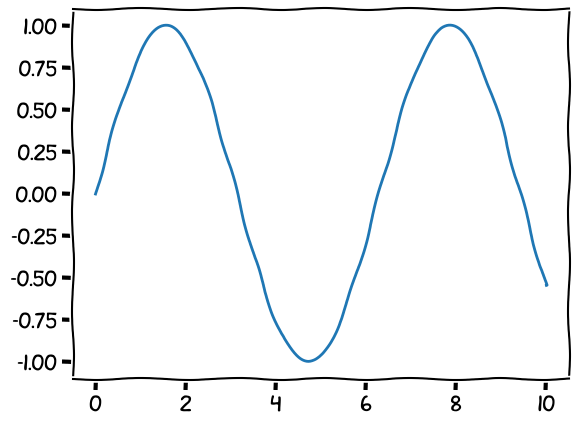

In [1]:
# example.py
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
y = np.sin(x)

with plt.xkcd():
    fig, ax = plt.subplots()
    ax.plot(x, y)

    fig.savefig("example.png")

     run_key           task_id                                         url  \
0   43e3be90  c4d0d3ad1a434686                                           /   
1   43e3be90  ced8fabf59e84e73                    /api/products/1YMWWN1N4O   
2   43e3be90  4da50a77cb094bd7          /api/data/?contextKeys=accessories   
3   43e3be90  173e0cf8a09f4f2c           /api/data/?contextKeys=telescopes   
4   43e3be90  d51844acde774693               /api/data/?contextKeys=travel   
5   43e3be90  7fa311c35e0e432b                                  /api/data/   
6   43e3be90  f97f5cc0022d44d5  /api/recommendations?productIds=9SIQT8TOJO   
7   43e3be90  f30275b626884fc6                                   /api/cart   
8   43e3be90  579b45336a734a3d                                   /api/cart   
9   43e3be90  2652c201dfb04829                    /api/products/9SIQT8TOJO   
10  43e3be90  a2482f9da6974a11                    /api/products/LS4PSXUNUM   
11  43e3be90  ce5965999b994ea4                               /ap

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
find

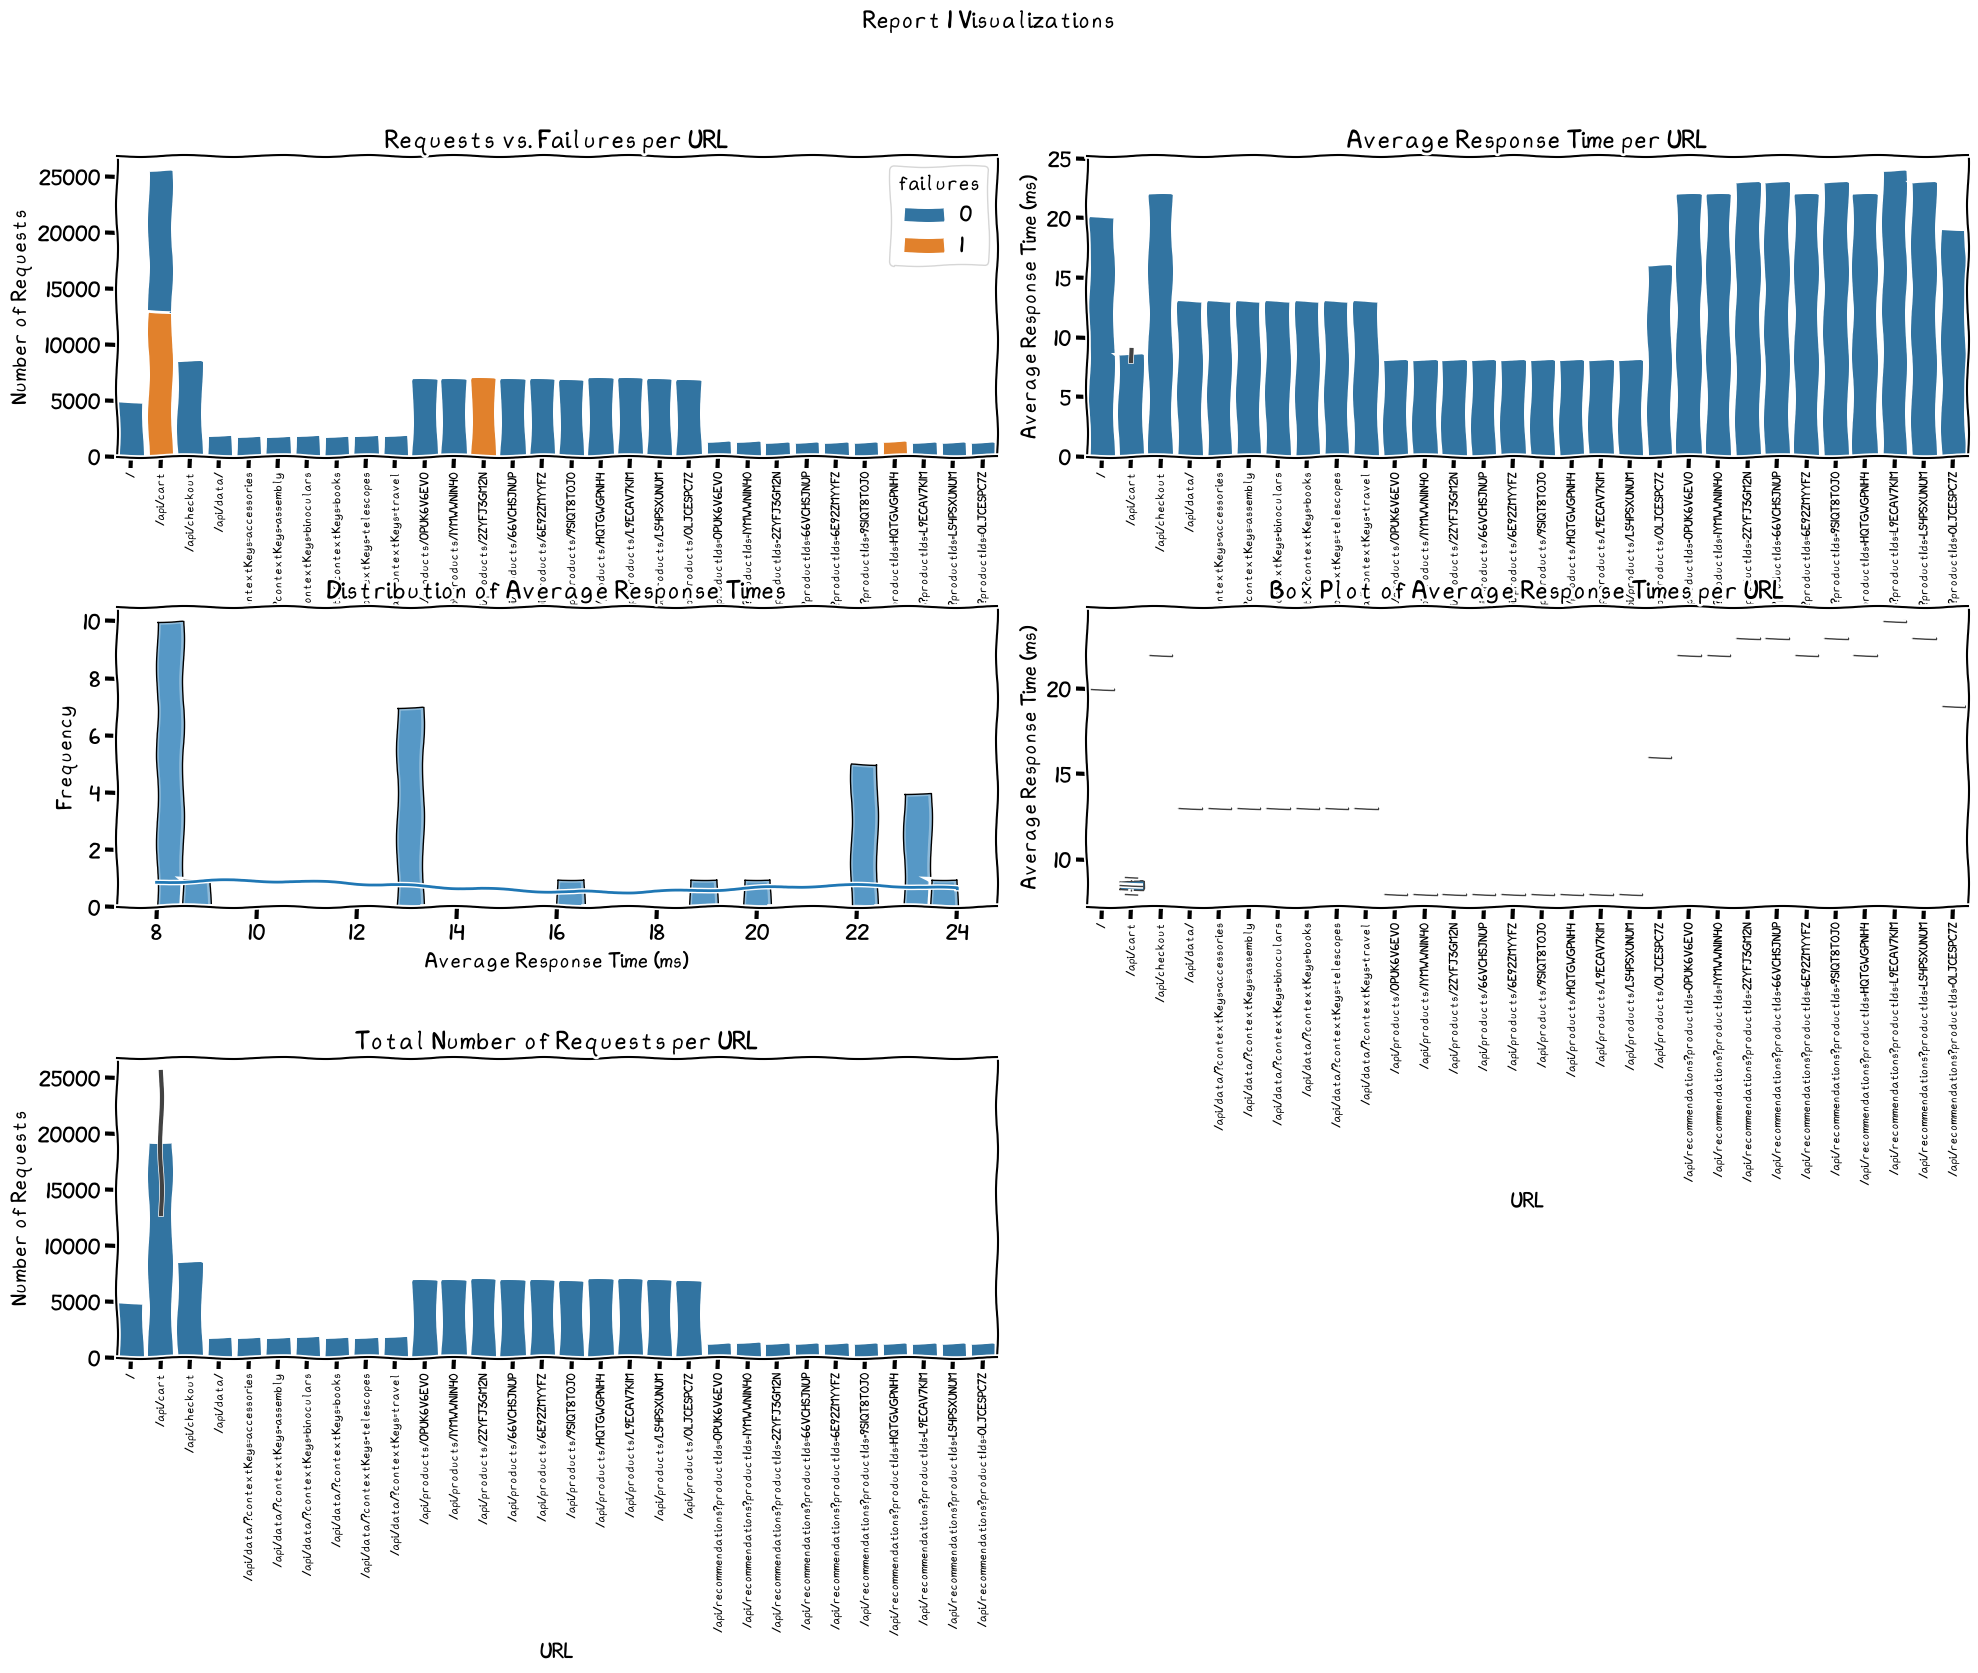

     run_key           task_id                                         url  \
0   f670fd03  b8d5741ab5eb4eae                                           /   
1   f670fd03  4fa2d587e1034a84                    /api/products/2ZYFJ3GM2N   
2   f670fd03  d5c9a70476864545                    /api/products/LS4PSXUNUM   
3   f670fd03  61616ab17d36405c                    /api/products/0PUK6V6EV0   
4   f670fd03  65edea9dda7f4aff                                   /api/cart   
5   f670fd03  049d6eb28c934f2d                                  /api/data/   
6   f670fd03  b0056974cc6c46fd           /api/data/?contextKeys=telescopes   
7   f670fd03  ba84af004b874305           /api/data/?contextKeys=binoculars   
8   f670fd03  020b365564104b95  /api/recommendations?productIds=OLJCESPC7Z   
9   f670fd03  a3fe926ed86042a9  /api/recommendations?productIds=1YMWWN1N4O   
10  f670fd03  cbd44ec5aa974077  /api/recommendations?productIds=HQTGWGPNH4   
11  f670fd03  da5f80e3fac44a65                                  

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
find

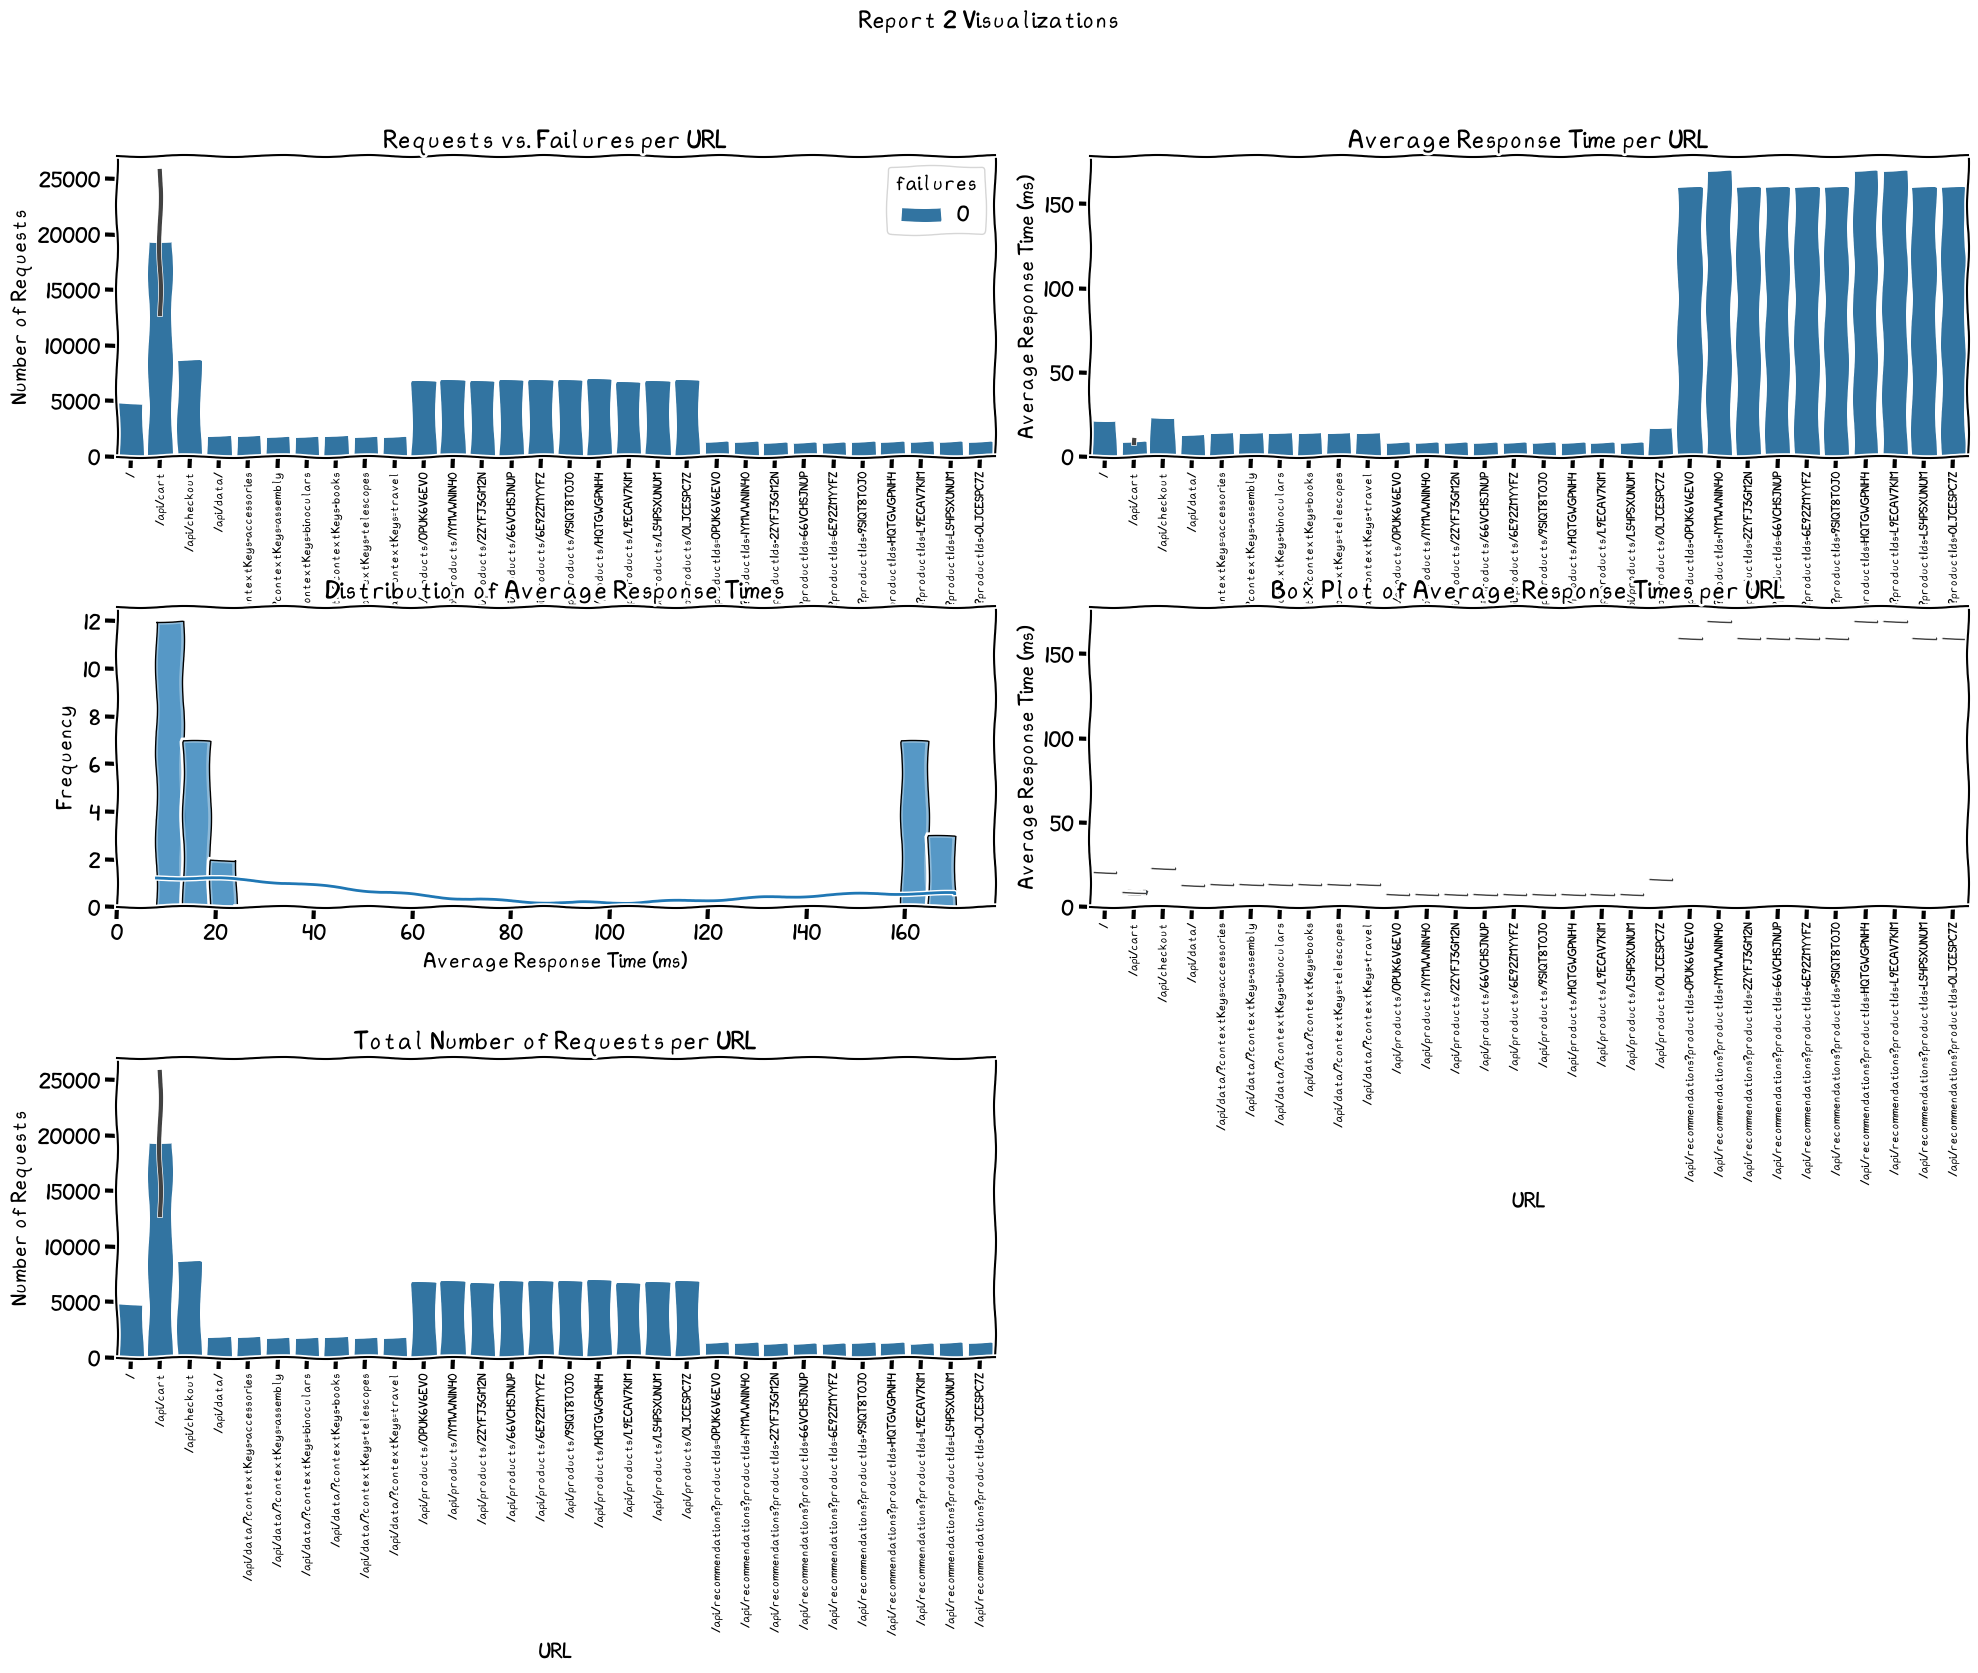

     run_key           task_id                                         url  \
0   df18a9fe  fbb6b9cb5e1d47f6                                           /   
1   df18a9fe  296eb2f256dd4369                    /api/products/0PUK6V6EV0   
2   df18a9fe  99dceff4d3e04abd                    /api/products/1YMWWN1N4O   
3   df18a9fe  93bedba04acd41ba                    /api/products/2ZYFJ3GM2N   
4   df18a9fe  a1ea357b2b2a4aa9                    /api/products/OLJCESPC7Z   
5   df18a9fe  4e7cefd8a3164d4b                    /api/products/LS4PSXUNUM   
6   df18a9fe  ca3bbc870eec486c  /api/recommendations?productIds=LS4PSXUNUM   
7   df18a9fe  7c027491d7d14a26                                   /api/cart   
8   df18a9fe  406ccde1e6854b7d                                   /api/cart   
9   df18a9fe  95daf4ed07764a75                    /api/products/L9ECAV7KIM   
10  df18a9fe  aca17a55fc5b4ef0                    /api/products/HQTGWGPNH4   
11  df18a9fe  f32c3a31b12c426b                               /ap

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
find

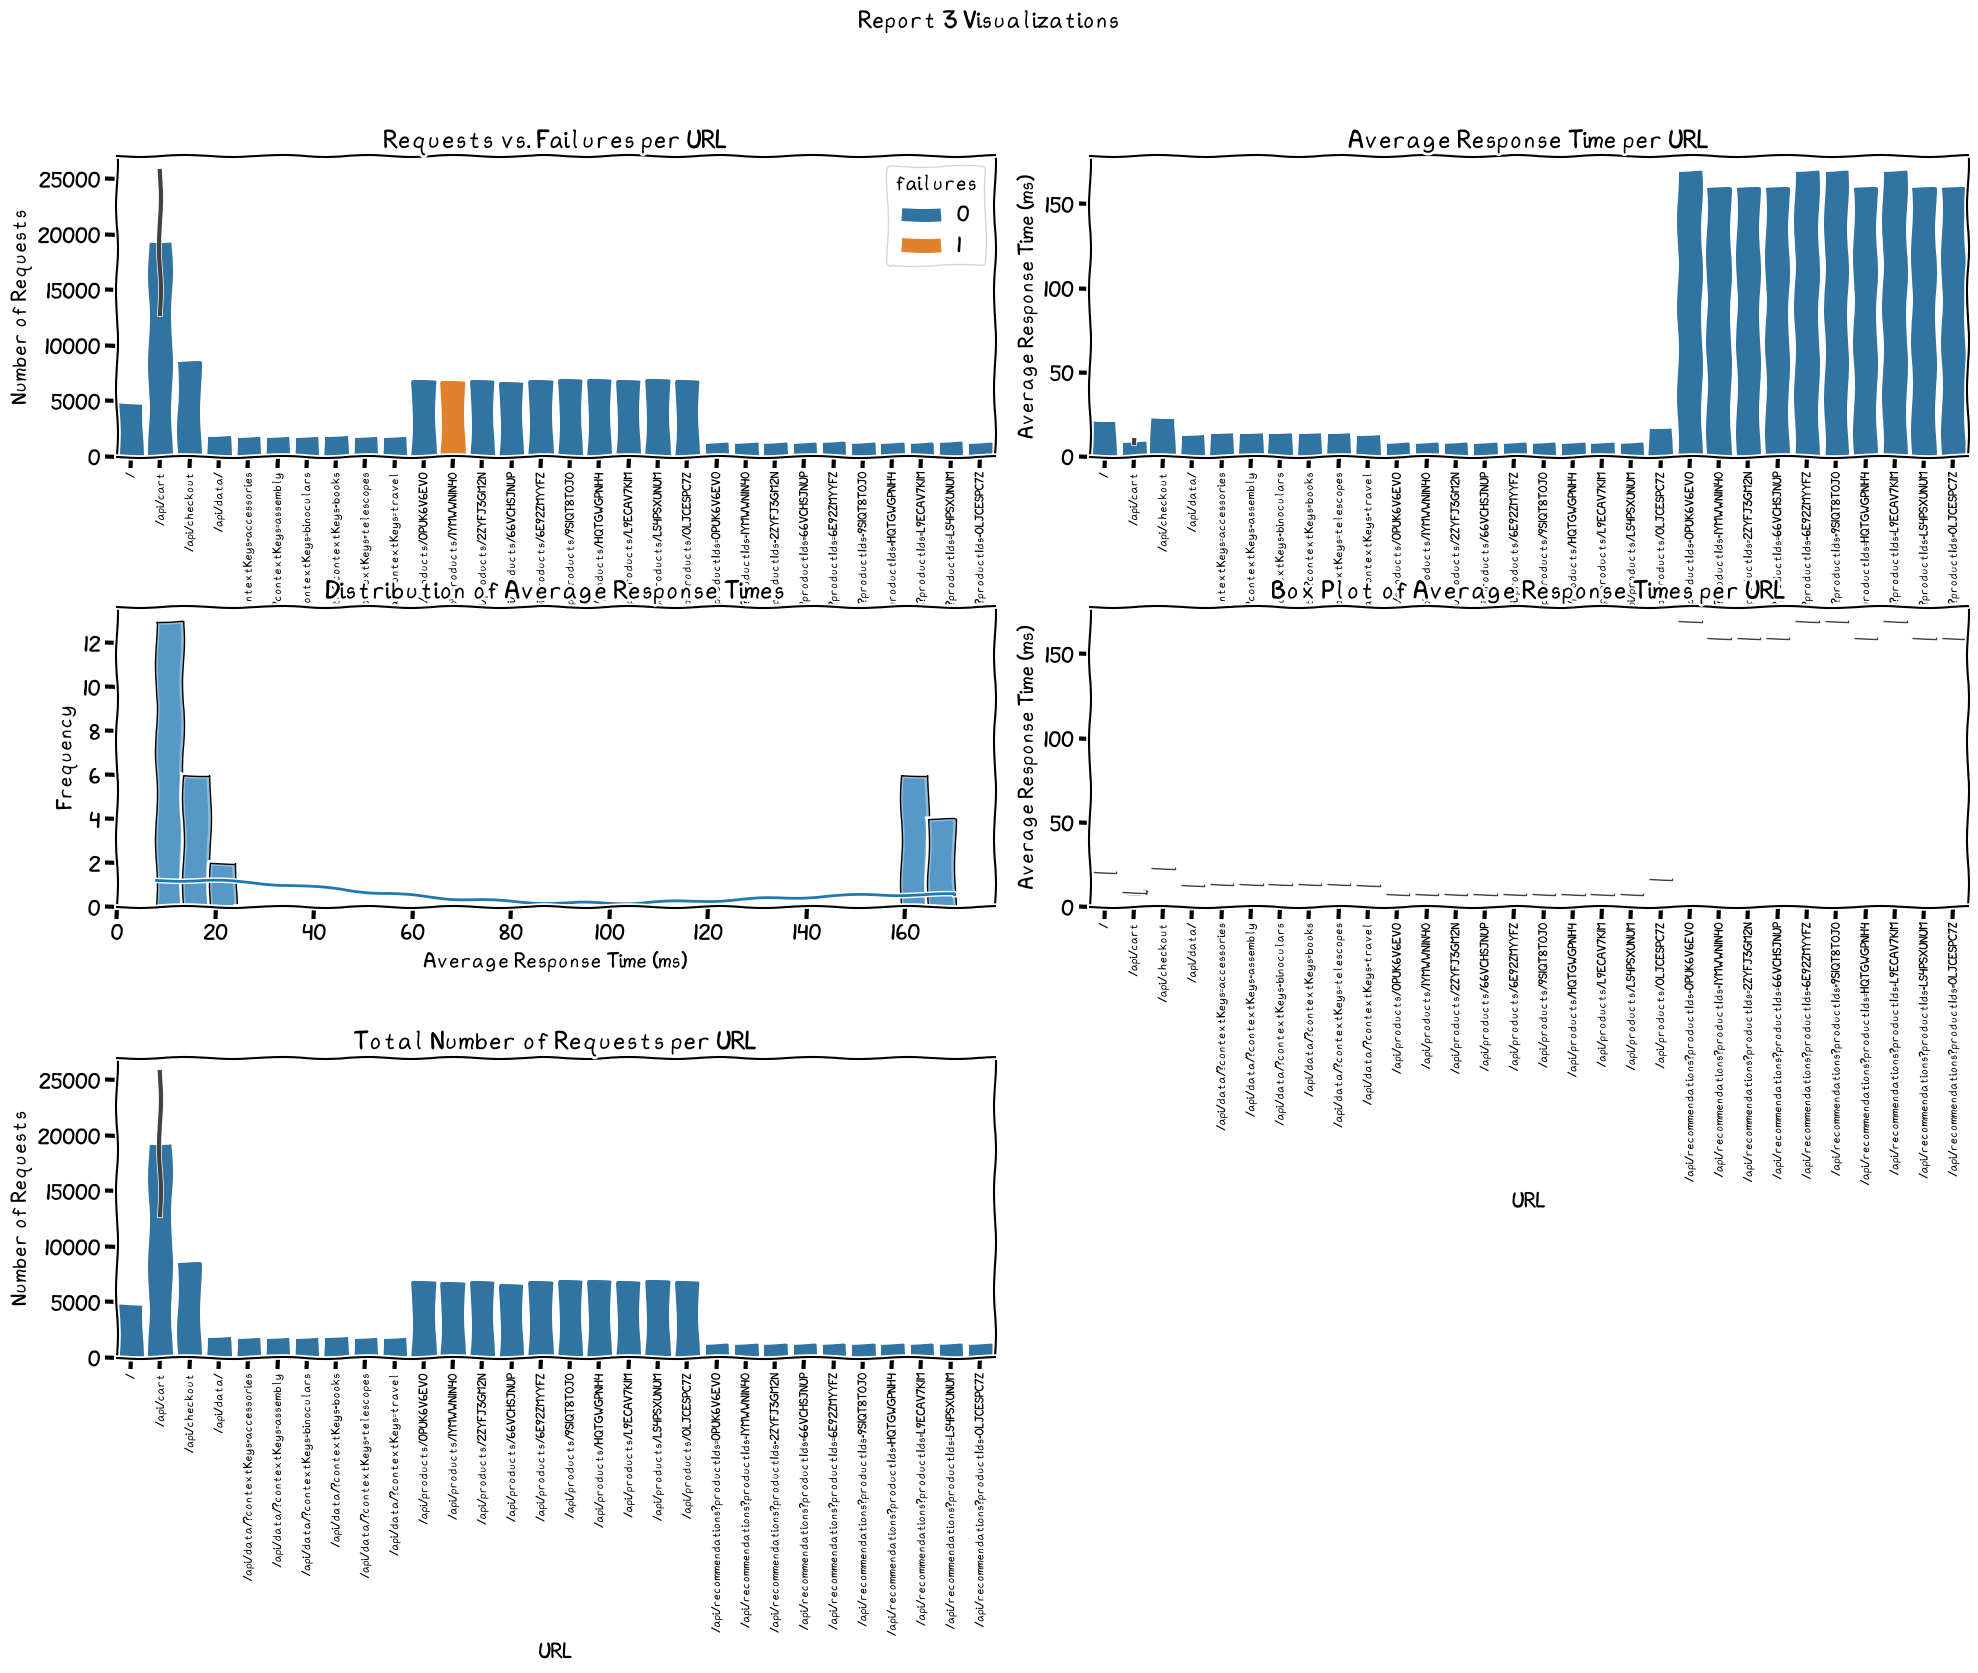

     run_key           task_id                                         url  \
0   f4a9b8c3  fef3248315f74bfe                                           /   
1   f4a9b8c3  675e5e94d9514309                    /api/products/9SIQT8TOJO   
2   f4a9b8c3  b291b15b69f241b4                    /api/products/L9ECAV7KIM   
3   f4a9b8c3  01b32991991c4d20                    /api/products/1YMWWN1N4O   
4   f4a9b8c3  570bc70af7ab4d16                    /api/products/2ZYFJ3GM2N   
5   f4a9b8c3  81c37627aa22473c                    /api/products/6E92ZMYYFZ   
6   f4a9b8c3  e532a36bfb7740b7                    /api/products/LS4PSXUNUM   
7   f4a9b8c3  ebf69061208140df                                   /api/cart   
8   f4a9b8c3  d2467b2978284841                                   /api/cart   
9   f4a9b8c3  400e8ace0636434e                    /api/products/66VCHSJNUP   
10  f4a9b8c3  f920e88b63094e80                    /api/products/0PUK6V6EV0   
11  f4a9b8c3  0541b5a8433e489a                    /api/products/

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'Comic Neue' not found.
find

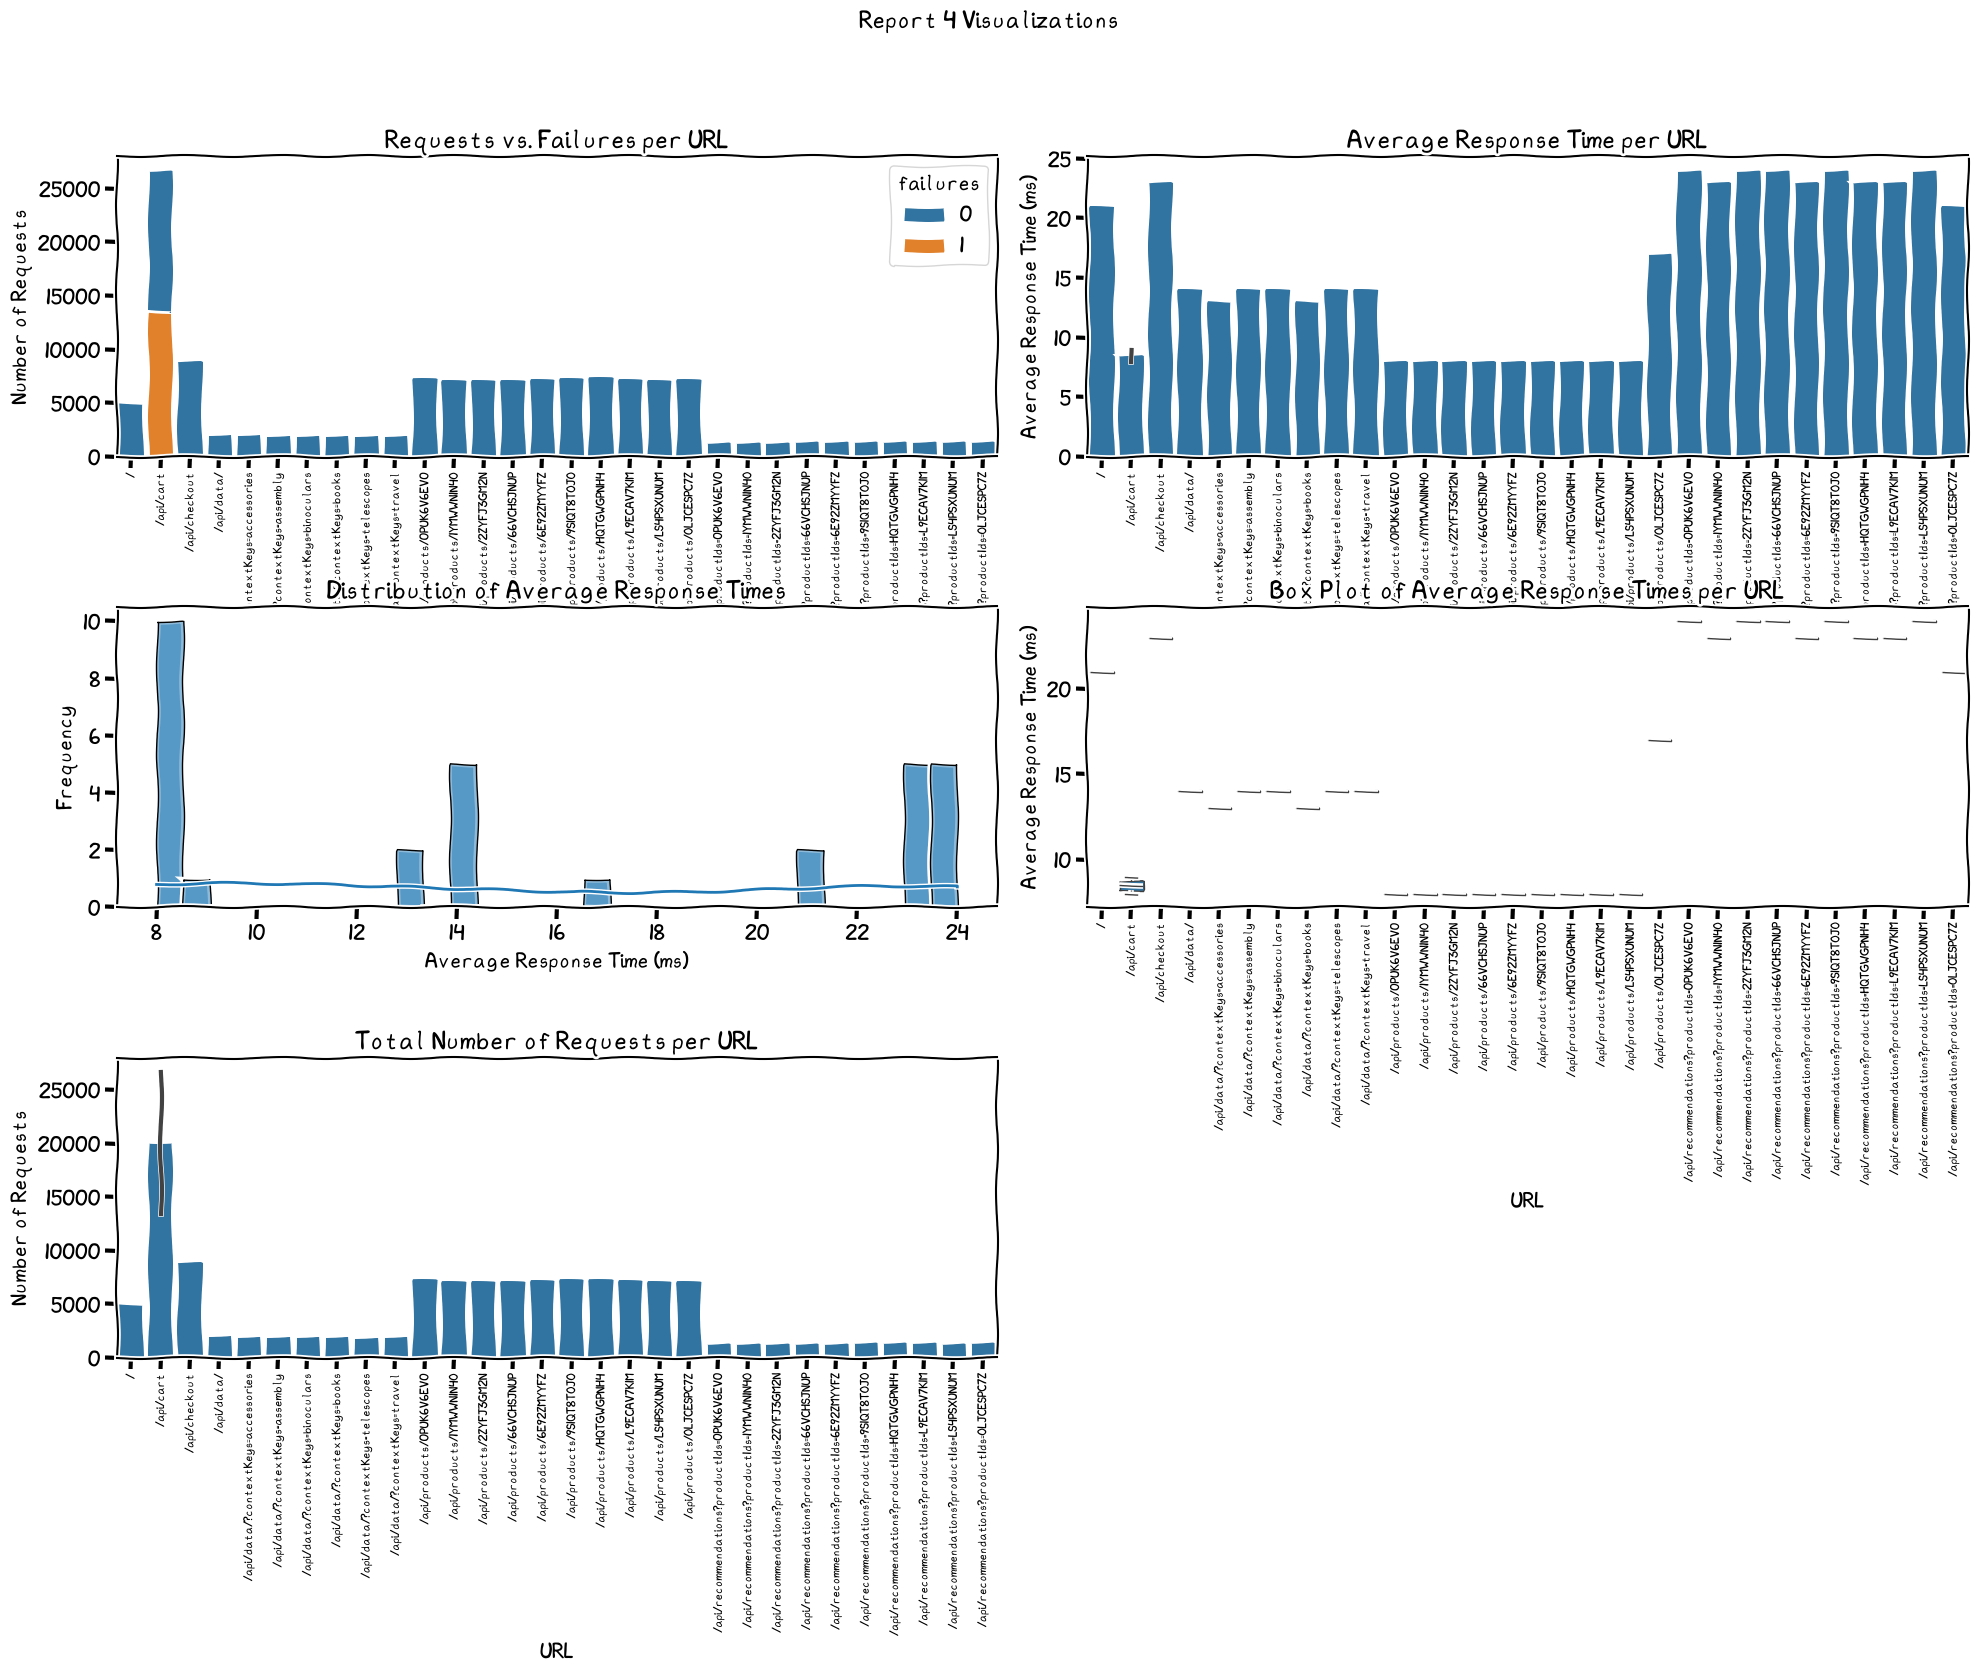

In [5]:
import matplotlib.pyplot as plt

# Use the xkcd style to give the plots a hand-drawn look
with plt.xkcd():
    for idx, report in enumerate(reports):
        loadgen_data = report.loadgen_data

        print(loadgen_data)

        # Sort the URLs
        sorted_urls = sorted(loadgen_data['url'].unique())

        # Create a grid for visualizations for each report
        fig, axes = plt.subplots(3, 2, figsize=(20, 18))
        fig.suptitle(f'Report {idx + 1} Visualizations', fontsize=16)

        # Visualization 1: Requests vs. Failures per URL
        sns.barplot(data=loadgen_data, x='url', y='requests', hue='failures', dodge=False, order=sorted_urls, ax=axes[0, 0])
        axes[0, 0].set_title('Requests vs. Failures per URL')
        axes[0, 0].set_xlabel('URL')
        axes[0, 0].set_ylabel('Number of Requests')
        axes[0, 0].tick_params(axis='x', rotation=90, labelsize=8)

        # Visualization 2: Average Response Time for Each URL
        sns.barplot(data=loadgen_data, x='url', y='median_response_time', order=sorted_urls, ax=axes[0, 1])
        axes[0, 1].set_title('Average Response Time per URL')
        axes[0, 1].set_xlabel('URL')
        axes[0, 1].set_ylabel('Average Response Time (ms)')
        axes[0, 1].tick_params(axis='x', rotation=90, labelsize=8)

        # Visualization 3: Distribution of Response Times
        sns.histplot(data=loadgen_data, x='median_response_time', kde=True, bins=30, ax=axes[1, 0])
        axes[1, 0].set_title('Distribution of Average Response Times')
        axes[1, 0].set_xlabel('Average Response Time (ms)')
        axes[1, 0].set_ylabel('Frequency')

        # Visualization 4: Response Time Metrics by URL
        sns.boxplot(data=loadgen_data, x='url', y='median_response_time', order=sorted_urls, ax=axes[1, 1])
        axes[1, 1].set_title('Box Plot of Average Response Times per URL')
        axes[1, 1].set_xlabel('URL')
        axes[1, 1].set_ylabel('Average Response Time (ms)')
        axes[1, 1].tick_params(axis='x', rotation=90, labelsize=8)

        # Visualization 5: Requests per URL
        sns.barplot(data=loadgen_data, x='url', y='requests', order=sorted_urls, ax=axes[2, 0])
        axes[2, 0].set_title('Total Number of Requests per URL')
        axes[2, 0].set_xlabel('URL')
        axes[2, 0].set_ylabel('Number of Requests')
        axes[2, 0].tick_params(axis='x', rotation=90, labelsize=8)

        # Hide the last subplot (axes[2, 1]) if not used
        axes[2, 1].axis('off')

        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.subplots_adjust(hspace=0.5)
        plt.show()


## Placeholder
----

In [ ]:
# Fault visibility scores for PacketLoss treatment 
visibility = report.get_visibility_df(use_traces=True, folds=2, score="accuracy", split=0.3)
visibility= visibility[visibility['treatment_name']=='delay_treatment']
visibility

In [11]:
#Import report for design alternative A
report = Report.from_file("reports/report_2024-09-29_16-36-56.yaml")


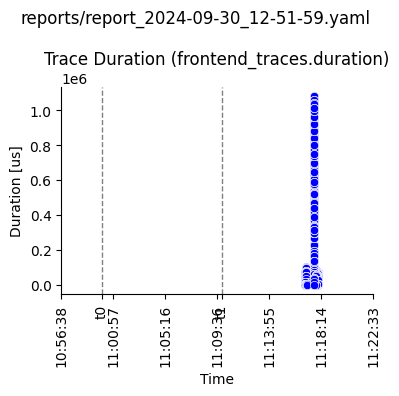

In [17]:
# Plot data for design alternative A
report.plot_interaction_grid(interactions=[0], rows=1, cols=1)

In [18]:
# Fault visibility score for design alternative A 
visibility = report.get_visibility_df(use_traces=True, folds=2, score="accuracy", split=0.3)
visibility= visibility[visibility['treatment_name']=='packet_loss_treatment']
visibility

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [19]:
#Import report for design alternative B
report = Report.from_file("recommendation_loss15_B.yaml")


FileNotFoundError: [Errno 2] No such file or directory: 'recommendation_loss15_B.yaml'

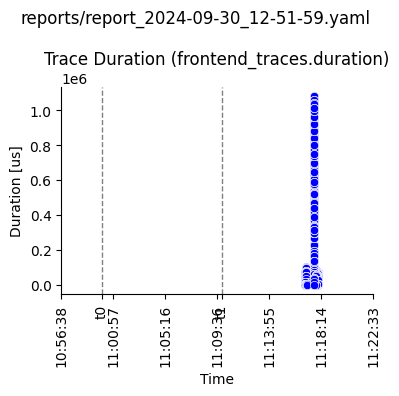

In [20]:
# Plot data for design alternative B
report.plot_interaction_grid(interactions=[0], rows=1, cols=1)

In [39]:
# Fault visibility scores for design alternative B 
visibility = report.get_visibility_df(use_traces=True, folds=2, score="accuracy", split=0.3)
visibility= visibility[visibility['treatment_name']=='packet_loss_treatment']
visibility

report         treatment_name       treatment_type  \
0  recommendation_loss15_B.yaml  packet_loss_treatment  PacketLossTreatment   
2  recommendation_loss15_B.yaml  packet_loss_treatment  PacketLossTreatment   

                    response_name          response_type classifier  \
0        frontend_traces.duration  TraceResponseVariable         LR   
2  recommendation_traces.duration  TraceResponseVariable         LR   

   visibility[accuracy]  
0              0.497605  
2              0.737213

In [40]:
#Import report for design alternative C
report = Report.from_file("recommendation_loss15_C.yaml")

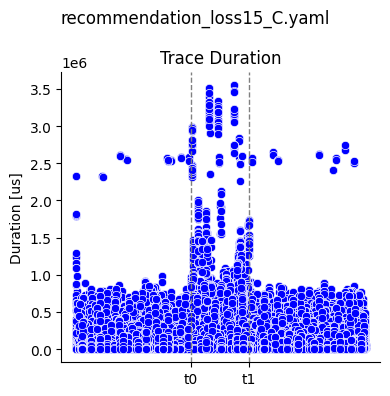

In [41]:
# Plot data for design alternative C
report.plot_interaction_grid(interactions=[0], rows=1, cols=1)

In [42]:
# Fault visibility scores for design alternative C 
visibility = report.get_visibility_df(use_traces=True, folds=2, score="accuracy", split=0.3)
visibility= visibility[visibility['treatment_name']=='packet_loss_treatment']
visibility

report         treatment_name       treatment_type  \
0  recommendation_loss15_C.yaml  packet_loss_treatment  PacketLossTreatment   
2  recommendation_loss15_C.yaml  packet_loss_treatment  PacketLossTreatment   

                    response_name          response_type classifier  \
0        frontend_traces.duration  TraceResponseVariable         LR   
2  recommendation_traces.duration  TraceResponseVariable         LR   

   visibility[accuracy]  
0              0.404290  
2              0.796552